# Titanic - Machine Learning from Disaster
https://github.com/jefferaj

**Best score: 79.665% (Top 5%)**

Our goal is to predict survival on the Titanic.

### Table of Contents
#### 1) Import Libraries

#### 2) Import Data

#### 3) Exploratory Data Analysis

#### 4) Feature Engineering 

#### 5) Feature Encoding

#### 6) Model Building

#### 7) Evaluation

#### 8) Submission

#### 9) References

## Import Libraries

In [1]:
%matplotlib inline

import datetime, time

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g., pd.read_csv)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
sns.set_theme(style="whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Machine Learning
from catboost import CatBoostClassifier, CatBoostRegressor, cv, Pool
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef, precision_score, recall_score
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings(action="ignore")

# List all input data files in the read-only "../input/" directory
import os
for dirpath, _, filenames in os.walk(top="/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Import Data

In [2]:
train_input = pd.read_csv(filepath_or_buffer="/kaggle/input/titanic/train.csv")
test_input = pd.read_csv(filepath_or_buffer="/kaggle/input/titanic/test.csv")

In [3]:
train_input  # View the training data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_input  # View the test data (same columns as the training data)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Exploratory Data Analysis

In [5]:
train_input.info()  # Quick look at our data types & null counts 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Data

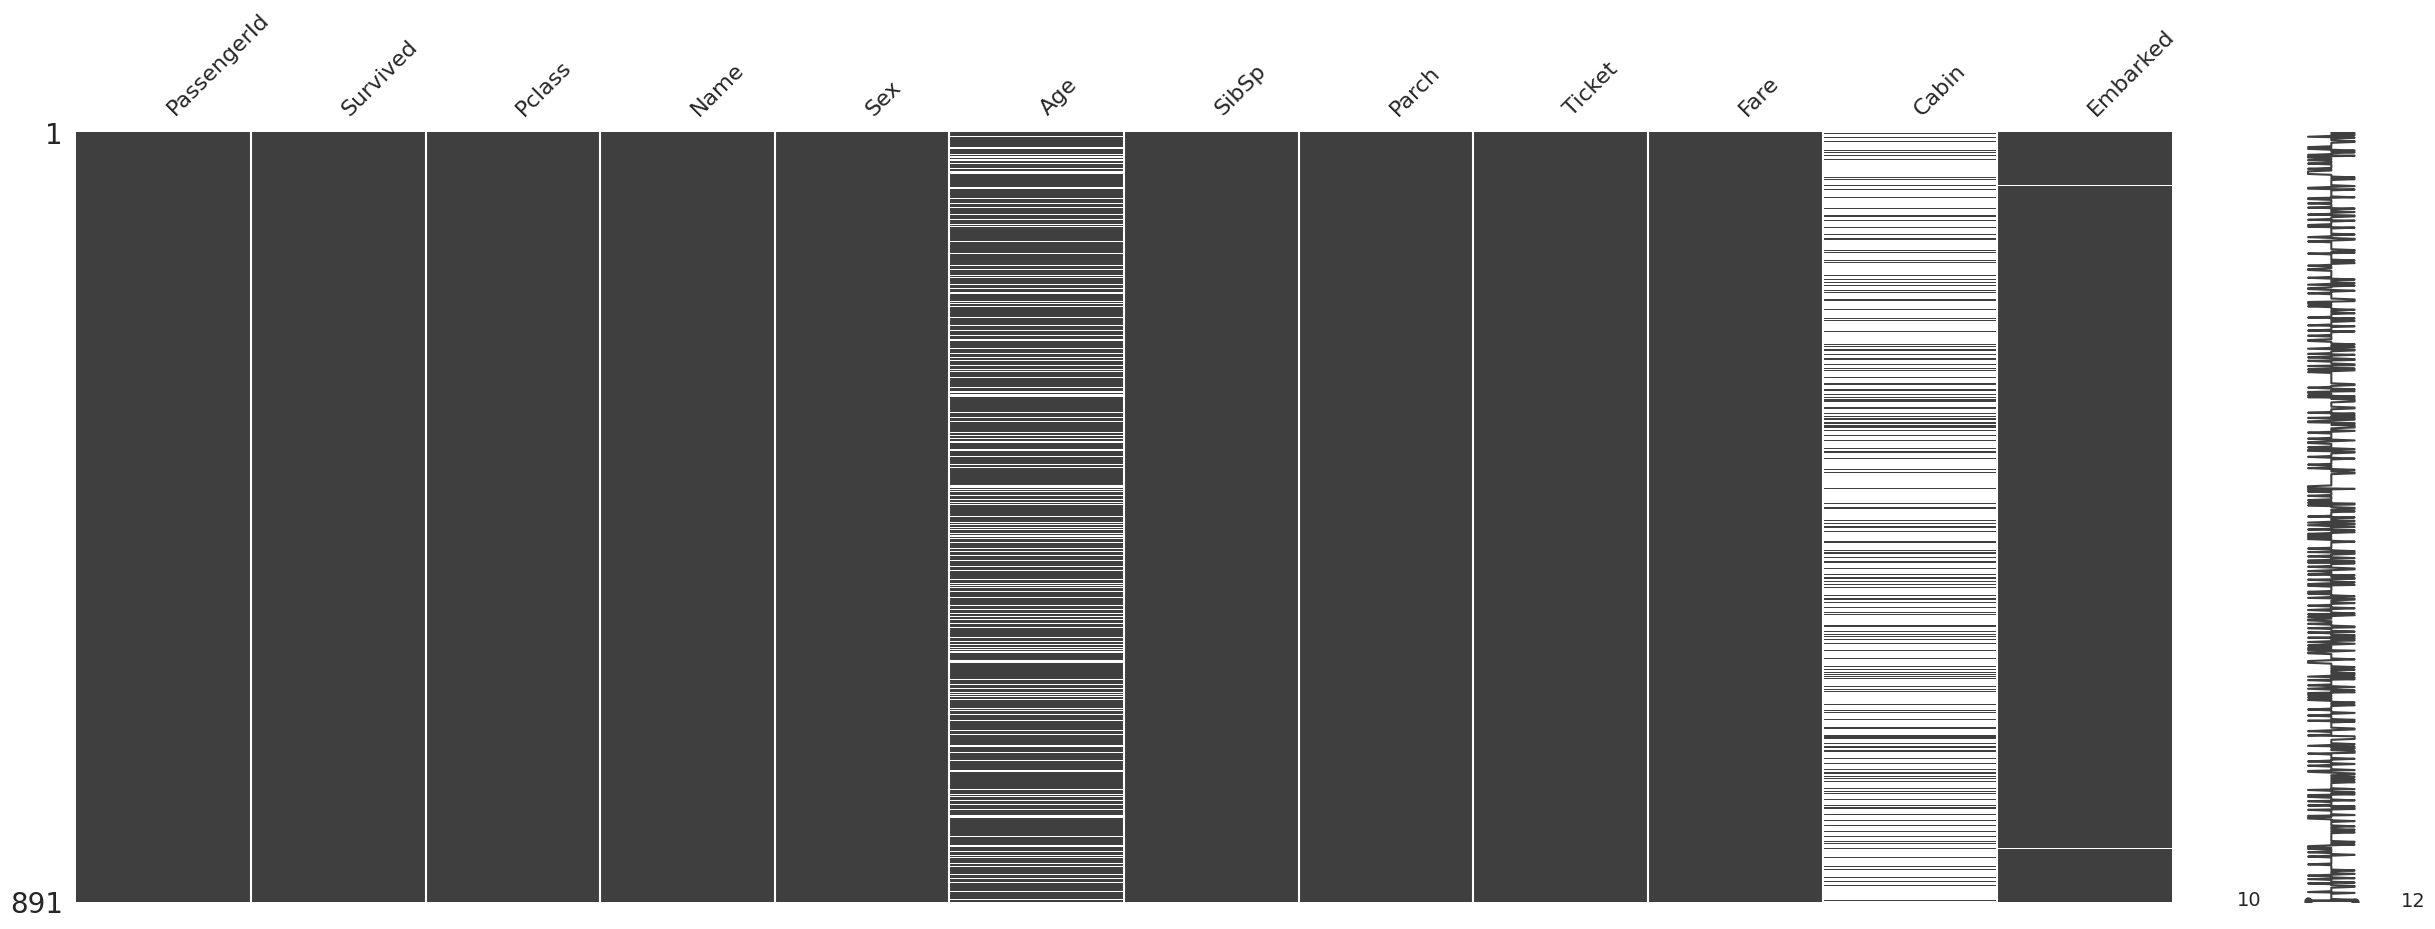

In [6]:
# Plot graphic of missing values
missingno.matrix(df=train_input, figsize=(30, 10))
plt.show()

Almost 20% of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably change it to another feature like "HasCabin: 1 or 0"

Embarked is missing two values in training and Fare is missing 1 value in test. We'll impute these using the most common values for each.

In [7]:
train_input.describe()  # Examine the central tendencies of the numeric data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


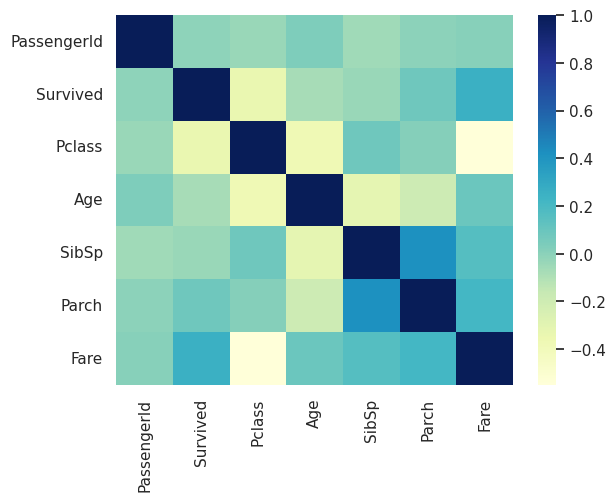

In [8]:
print(train_input.corr(numeric_only=True))
sns.heatmap(data = train_input.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

### Target Feature: Survived

Survived
0    549
1    342
Name: count, dtype: int64


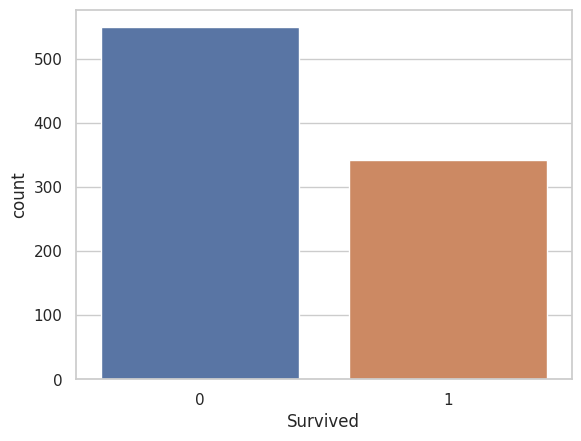

In [9]:
# How many people survived?
print(train_input["Survived"].value_counts())
sns.countplot(x="Survived", data=train_input)
plt.show()

In [10]:
train_input["IsTrain"] = 1
test_input["IsTrain"] = 0
test_input["Survived"] = np.NaN

all_data = pd.concat([train_input, test_input], ignore_index=True)  # Survived will be upcast to a float in this dataframe as it contains NaN
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'IsTrain'], dtype='object')

In [11]:
# Look at numeric and categorical values separately 
numerical_columns = ["Age", "Fare", "Parch", "SibSp"]
categorical_columns = ["Cabin", "Embarked", "Name", "Pclass", "Sex", "Ticket"]

### Numeric Features
Variables: "Age", "Fare", "Parch", "SibSp"

In [12]:
def plot_hist_dist(df: pd.DataFrame, label_column: str, target_column: str, figsize: tuple = (20, 5), discrete: bool = False, rotate_xaxis_labels: bool = False) -> None:
    """
    Function to plot frequencies and distributions of a label variable and target variable side by side.
    ::param_df:: = target dataframe
    ::param_label_column:: = binary labeled column
    ::param_target_column:: = column you want to view frequencies and distributions
    ::param_figsize:: = size of figure (width, height), default (20, 5)
    ::param_discrete:: = whether or not to consider the target column as discrete, default False
    ::param_rotate_xaxis_labels:: = whether or not rotate the x-axis labels 90 degrees, default False
    """
    plt.figure(figsize=figsize)
    
    plt.subplot(1, 2, 1)
    df[target_column].plot.hist()
    plt.xlabel(xlabel=target_column)

    plt.subplot(1, 2, 2)
    sns.histplot(data = df[df[label_column] == 1][target_column], discrete=discrete, kde=(not discrete), label="Survived")
    sns.histplot(data = df[df[label_column] == 0][target_column], discrete=discrete, kde=(not discrete), label="Did not survive")
    plt.xticks(rotation=(90 * rotate_xaxis_labels))
    plt.legend()

    plt.show()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


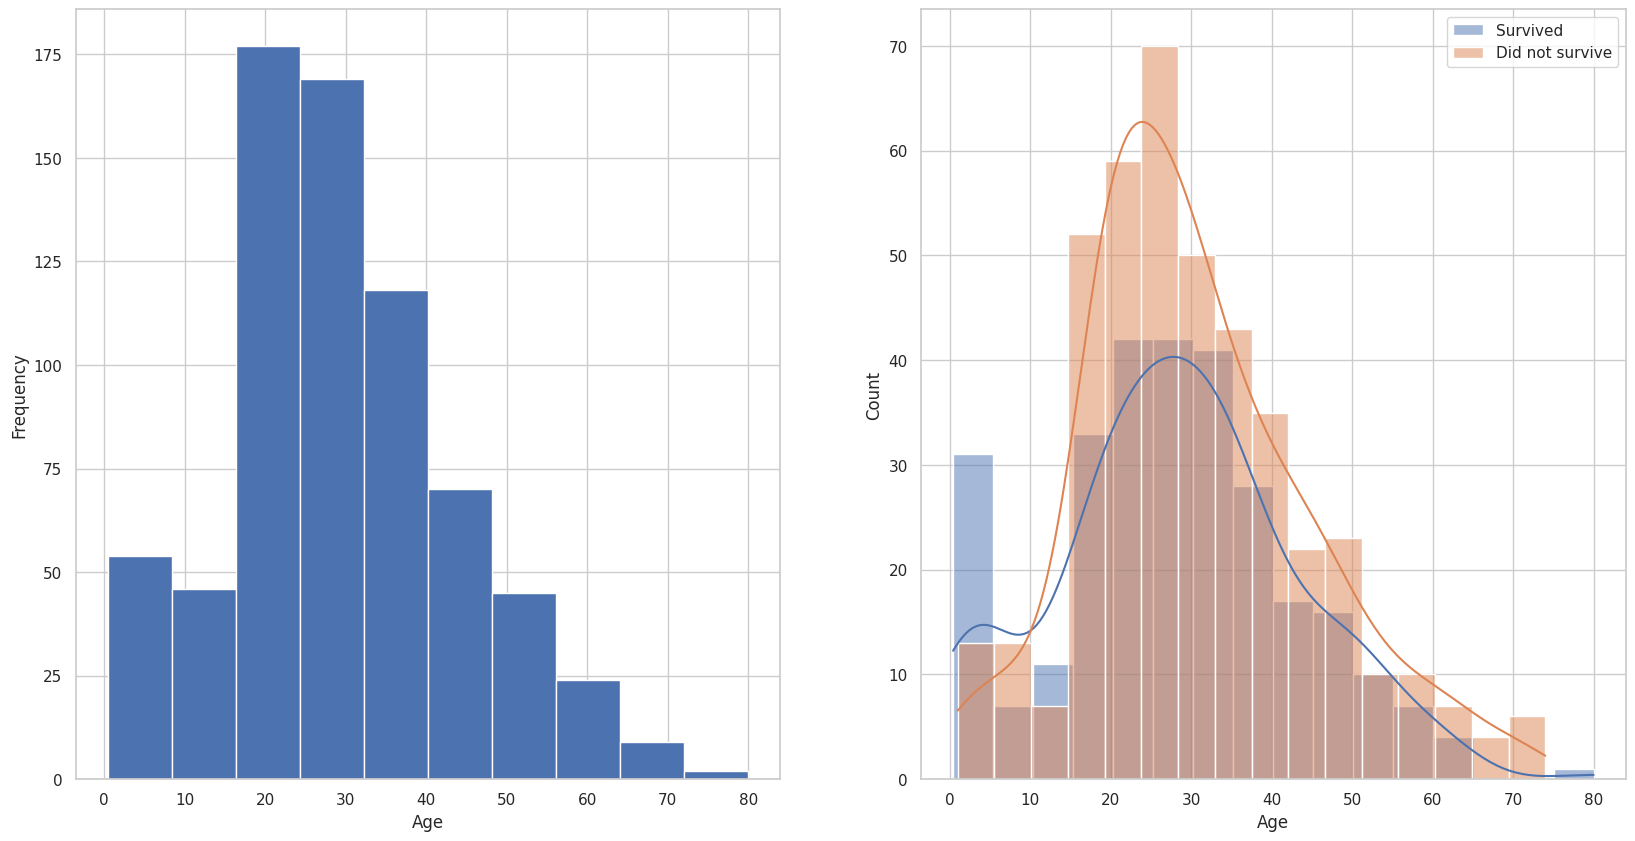

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


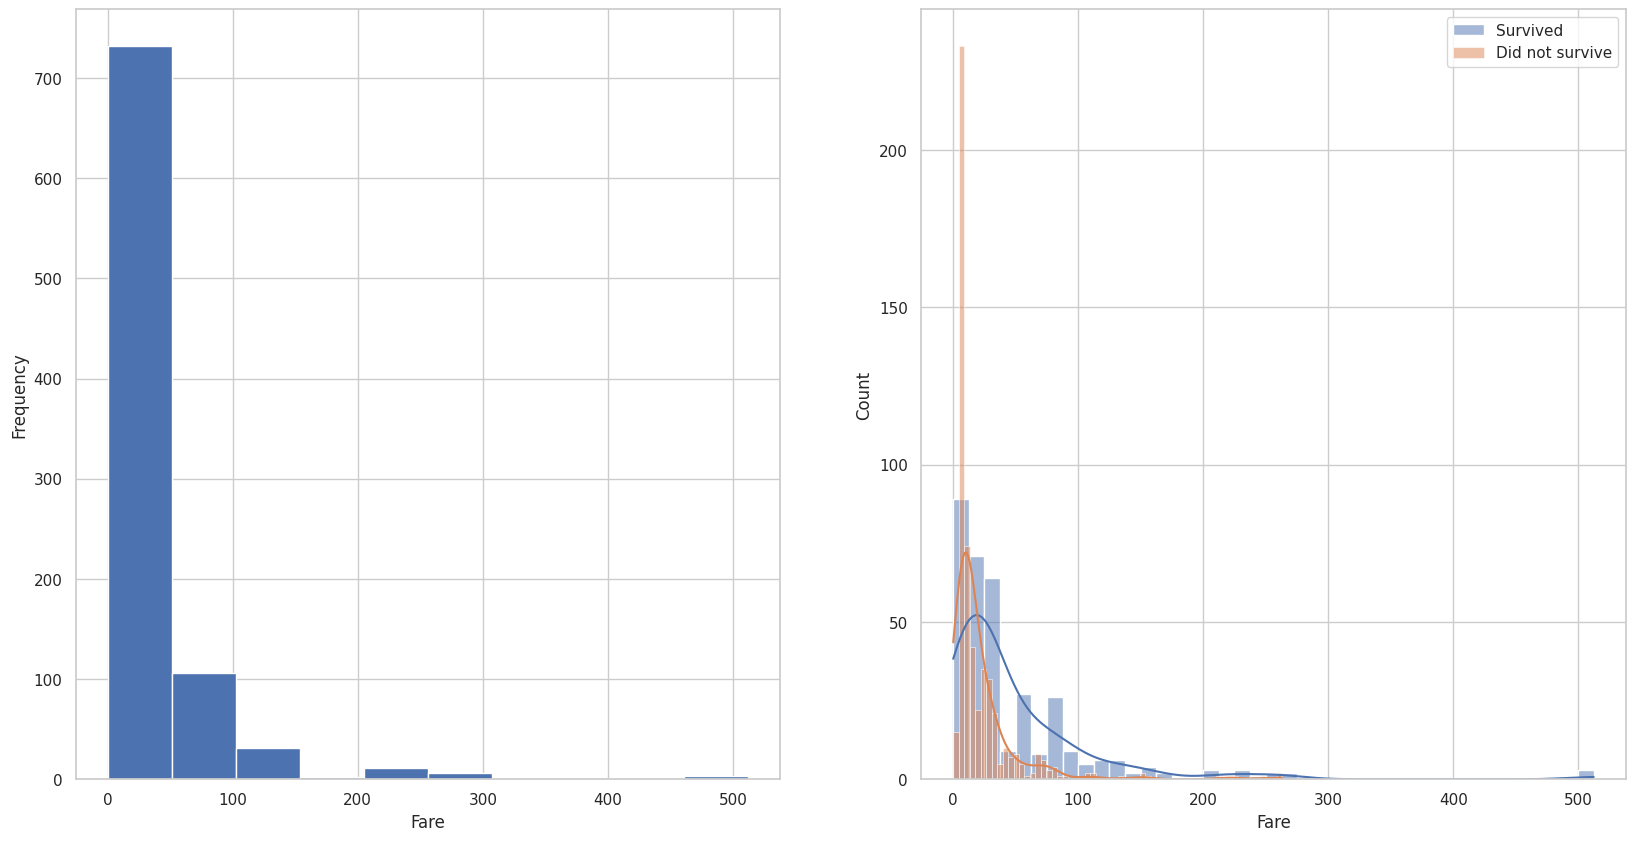

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


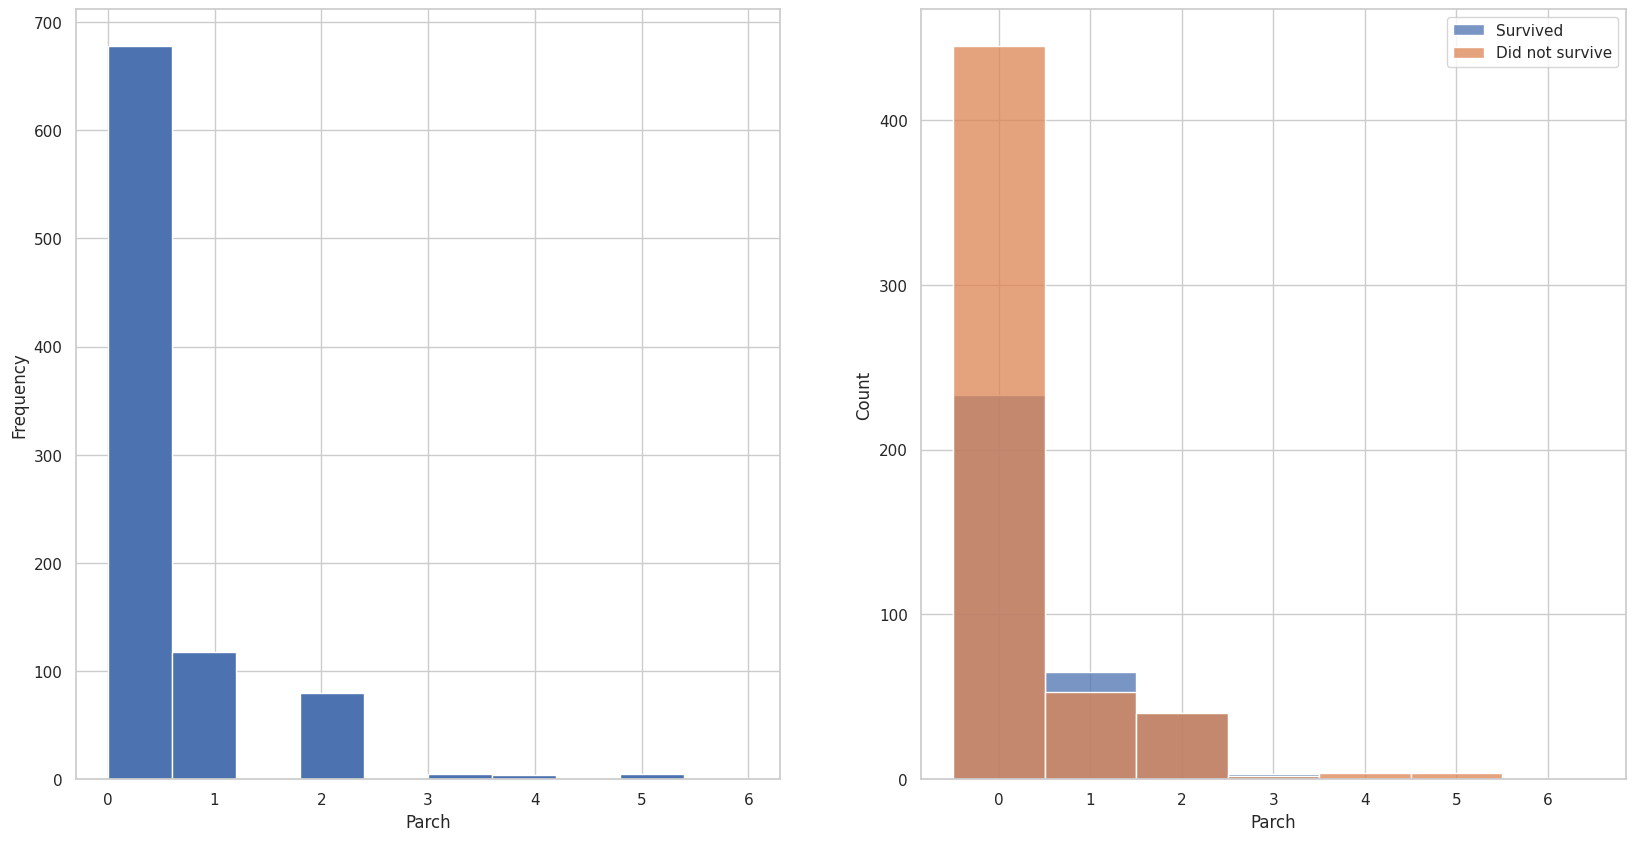

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


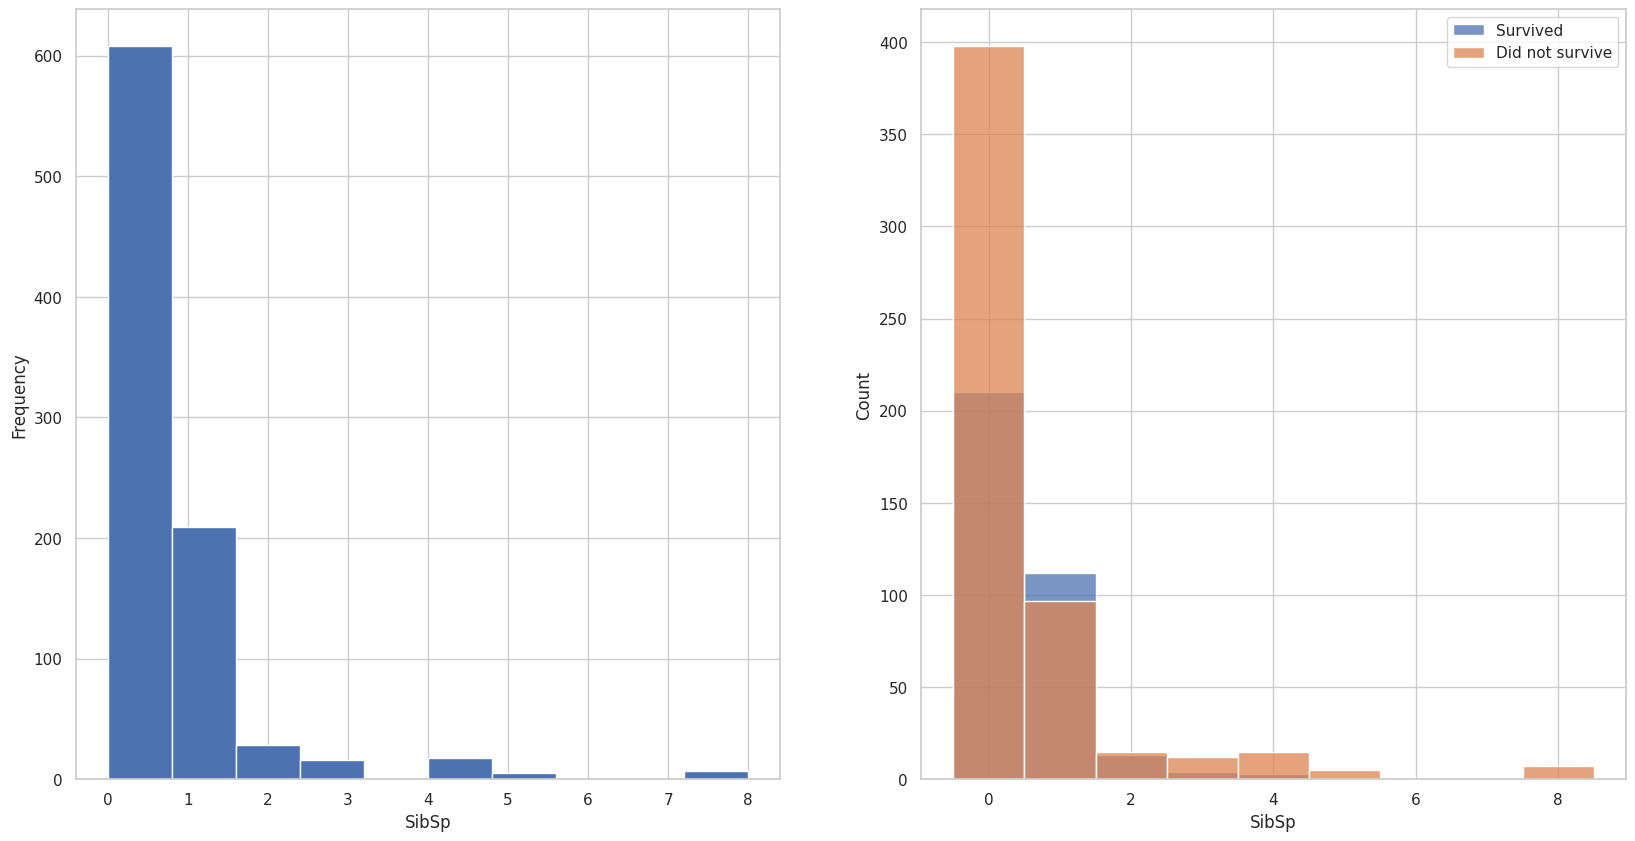

In [13]:
for column_name in numerical_columns:
    print(train_input[column_name].value_counts())  # What values are there?

    plot_hist_dist(df=train_input, 
                   label_column="Survived", 
                   target_column=column_name, 
                   figsize=(20, 10), 
                   discrete=(column_name == "Parch" or column_name == "SibSp"), 
                   rotate_xaxis_labels=False)

In [14]:
# Compare survival rate across Age, Fare, Parch, and SibSp
pd.pivot_table(data=train_input, index="Survived", values=numerical_columns, aggfunc="mean")

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### Categorical Features
Variables: "Cabin", "Embarked", "Name", "Pclass", "Sex", "Ticket"

In [15]:
def plot_count_dist(df: pd.DataFrame, label_column: str, target_column: str, figsize: tuple = (20, 5), rotate_xaxis_labels: bool = False) -> None:
    """
    Function to plot counts and distributions of a label variable and target variable side by side.
    ::param_df:: = target dataframe
    ::param_label_column:: = binary labeled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height), default (20, 5)
    ::param_rotate_xaxis_labels:: = whether or not rotate the x-axis labels 90 degrees, default False
    """
    plt.figure(figsize=figsize)
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=target_column, data=df)
    plt.xticks(rotation=(90 * rotate_xaxis_labels))

    plt.subplot(1, 2, 2)
    sns.countplot(x=target_column, hue=label_column, data=df)
    plt.xticks(rotation=(90 * rotate_xaxis_labels))

    plt.show()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64


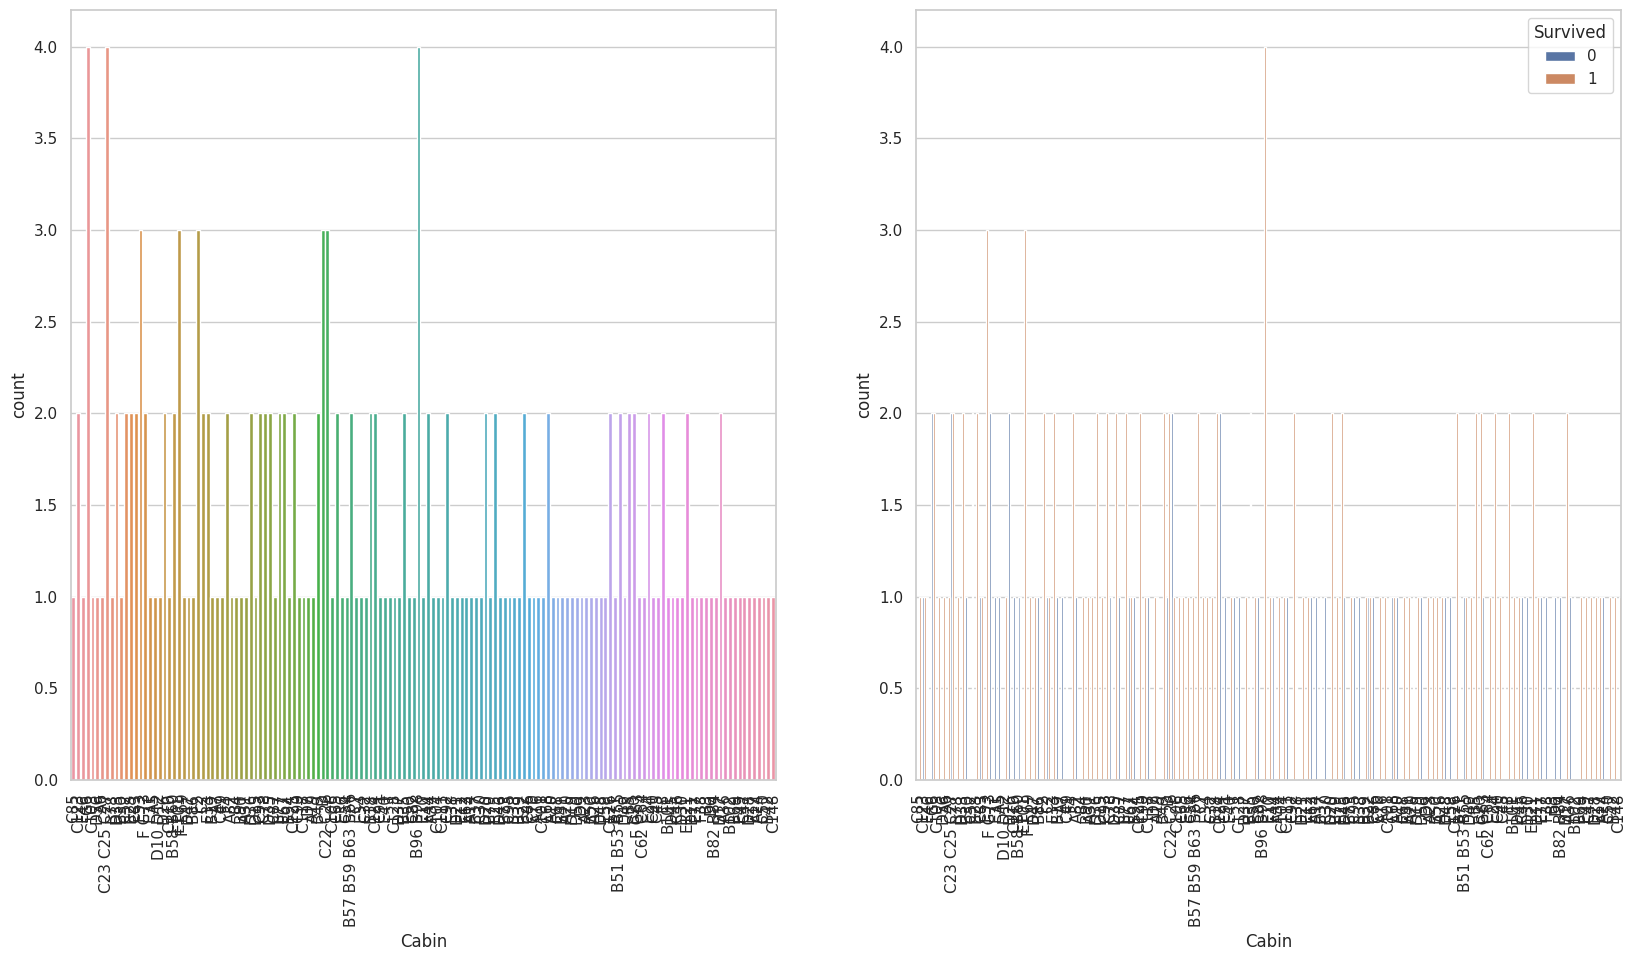

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


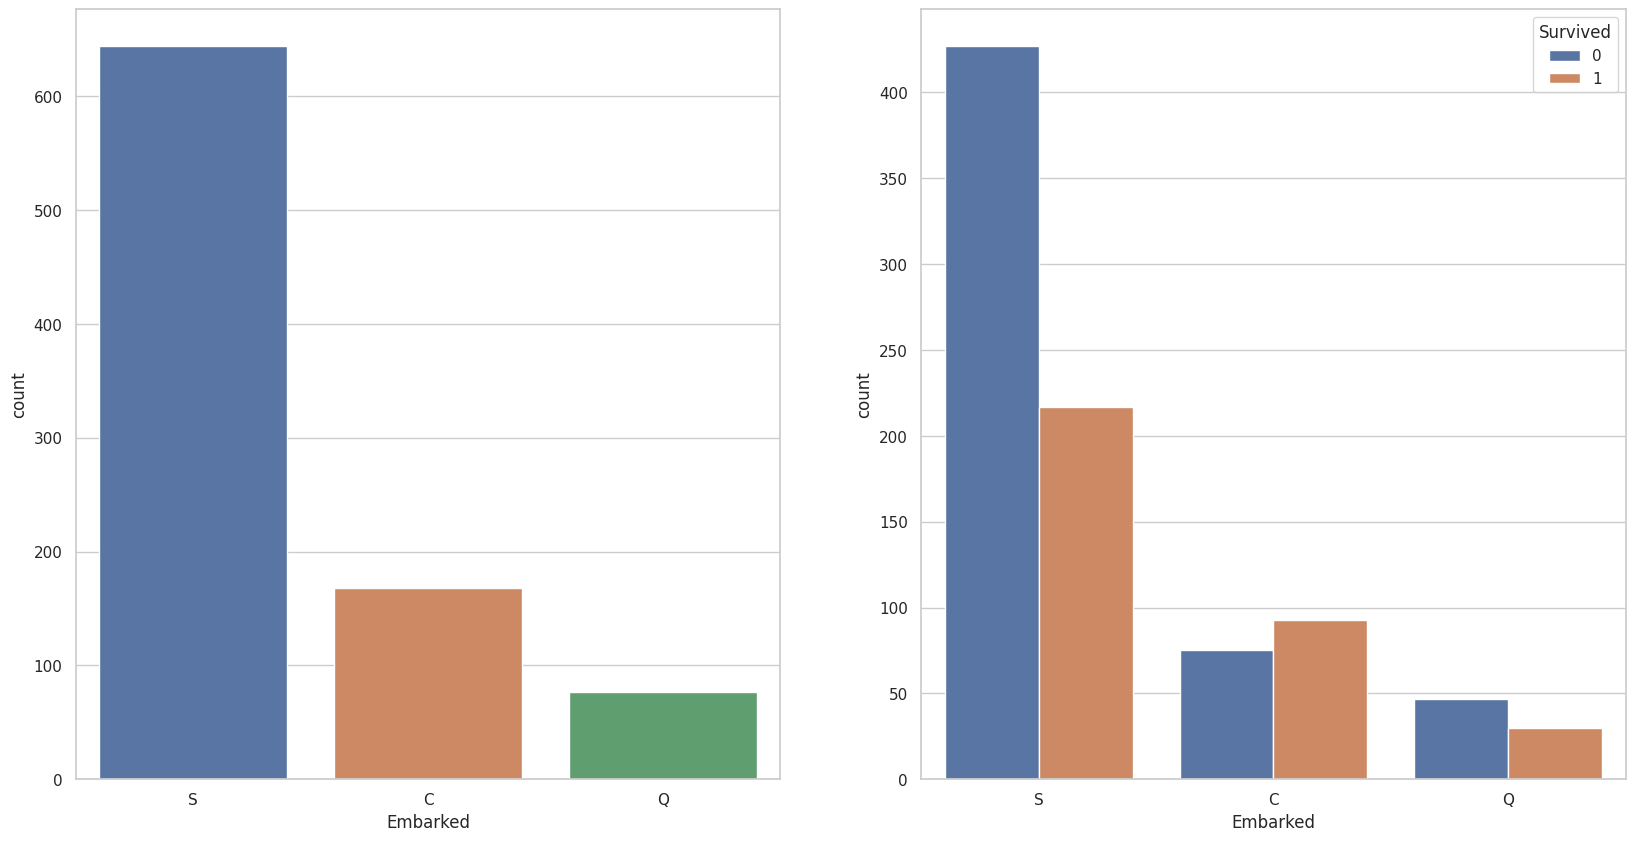

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


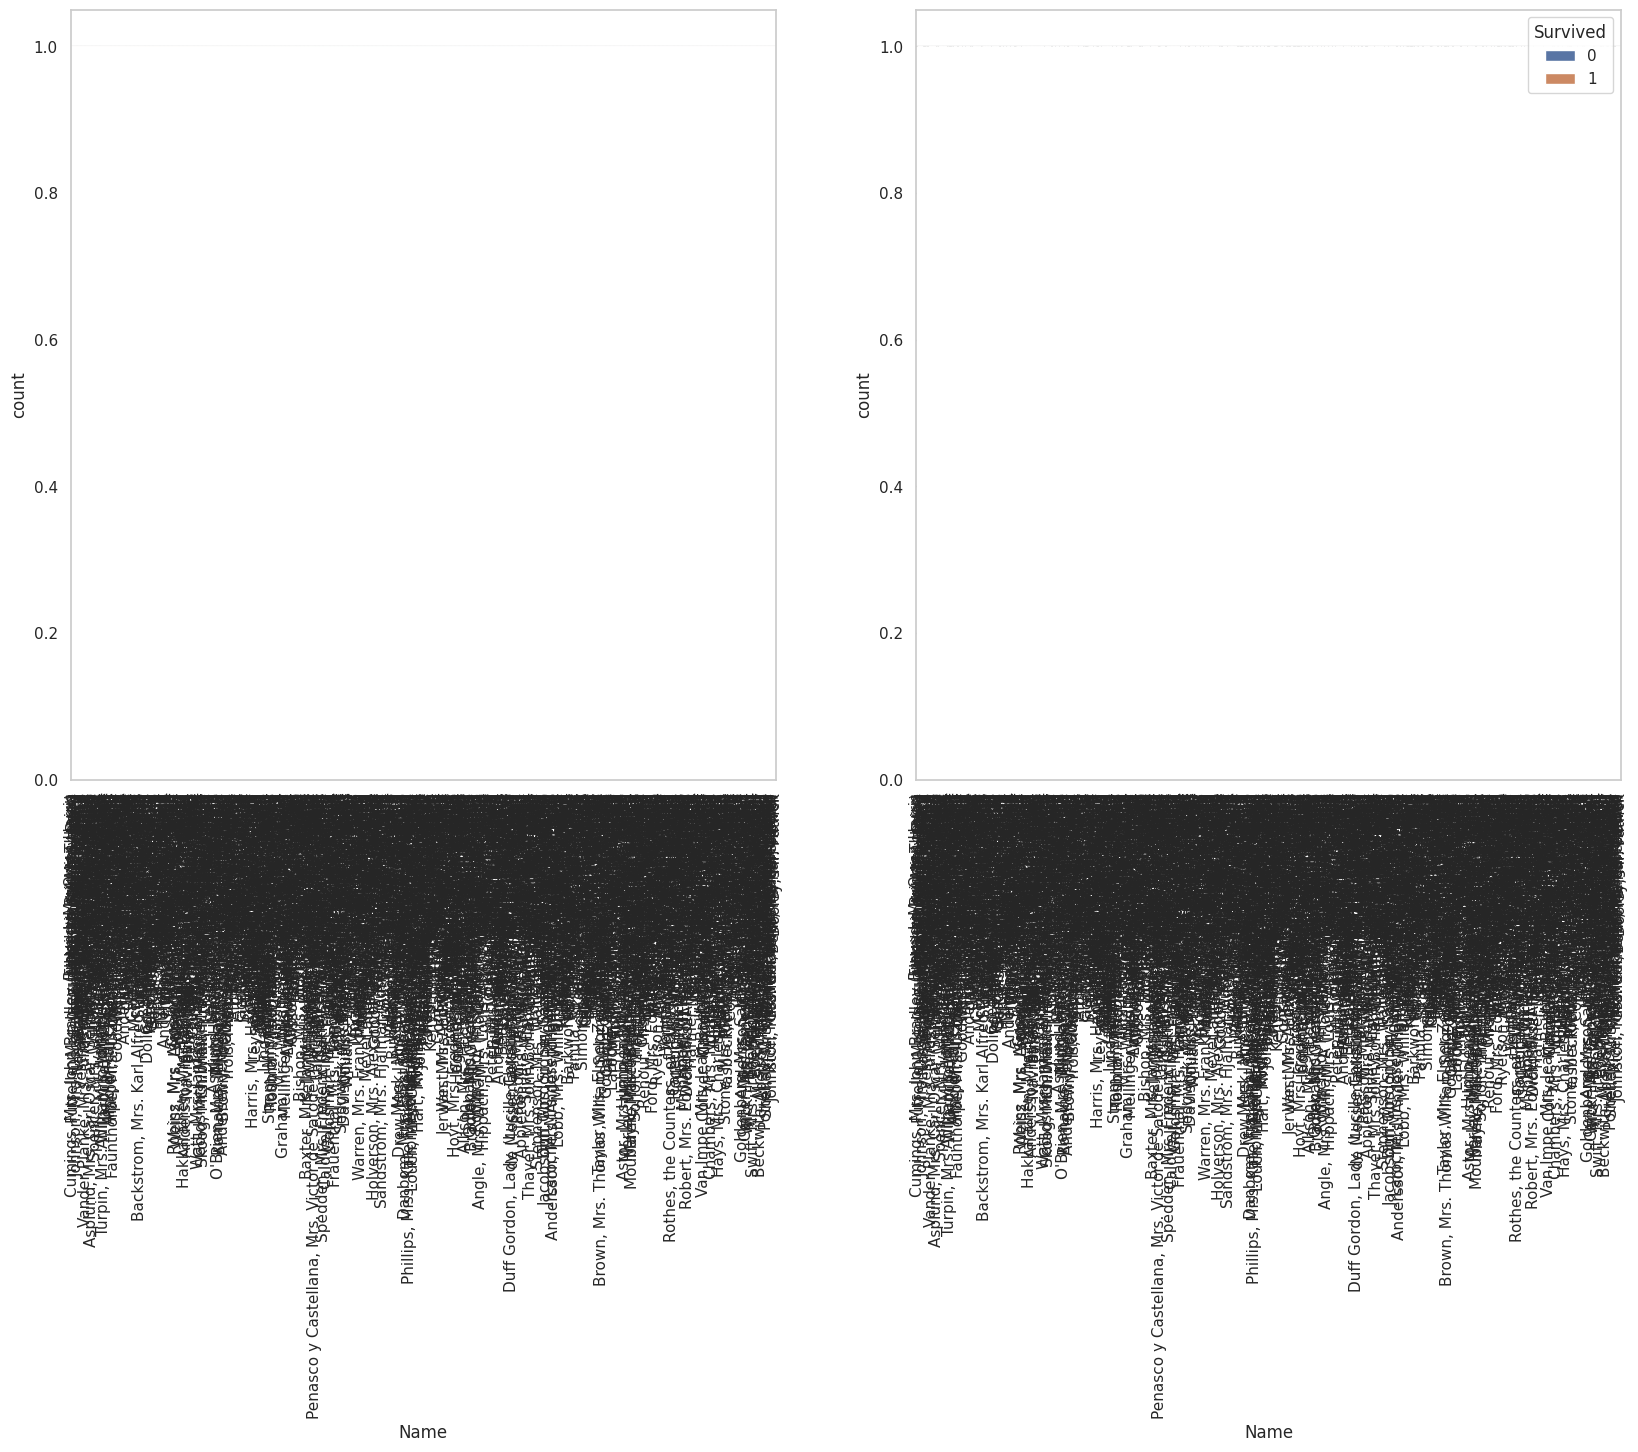

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


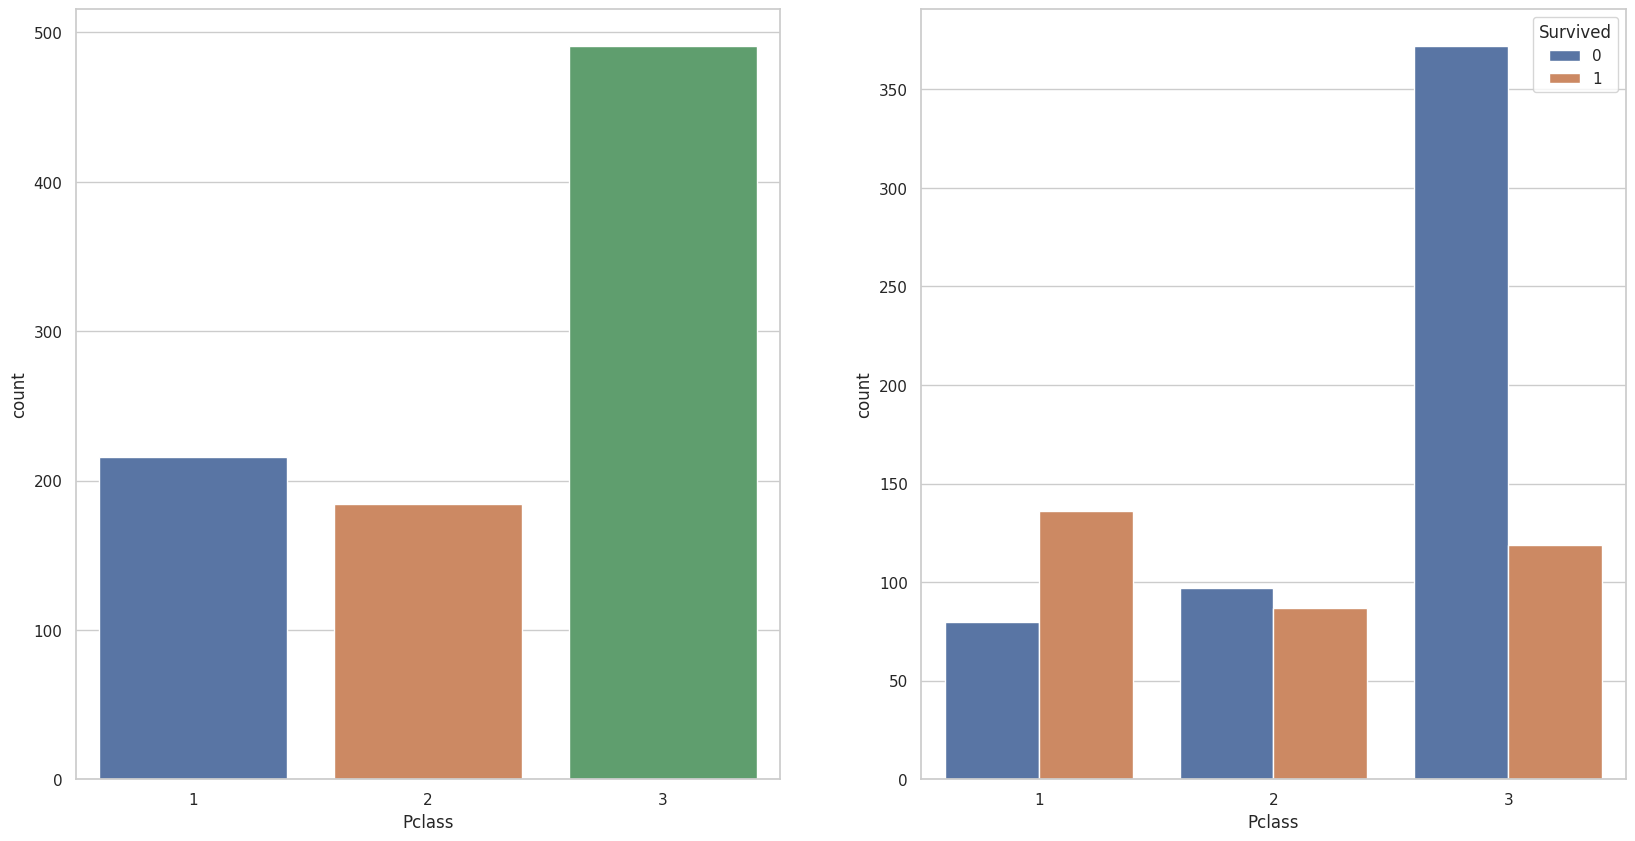

Sex
male      577
female    314
Name: count, dtype: int64


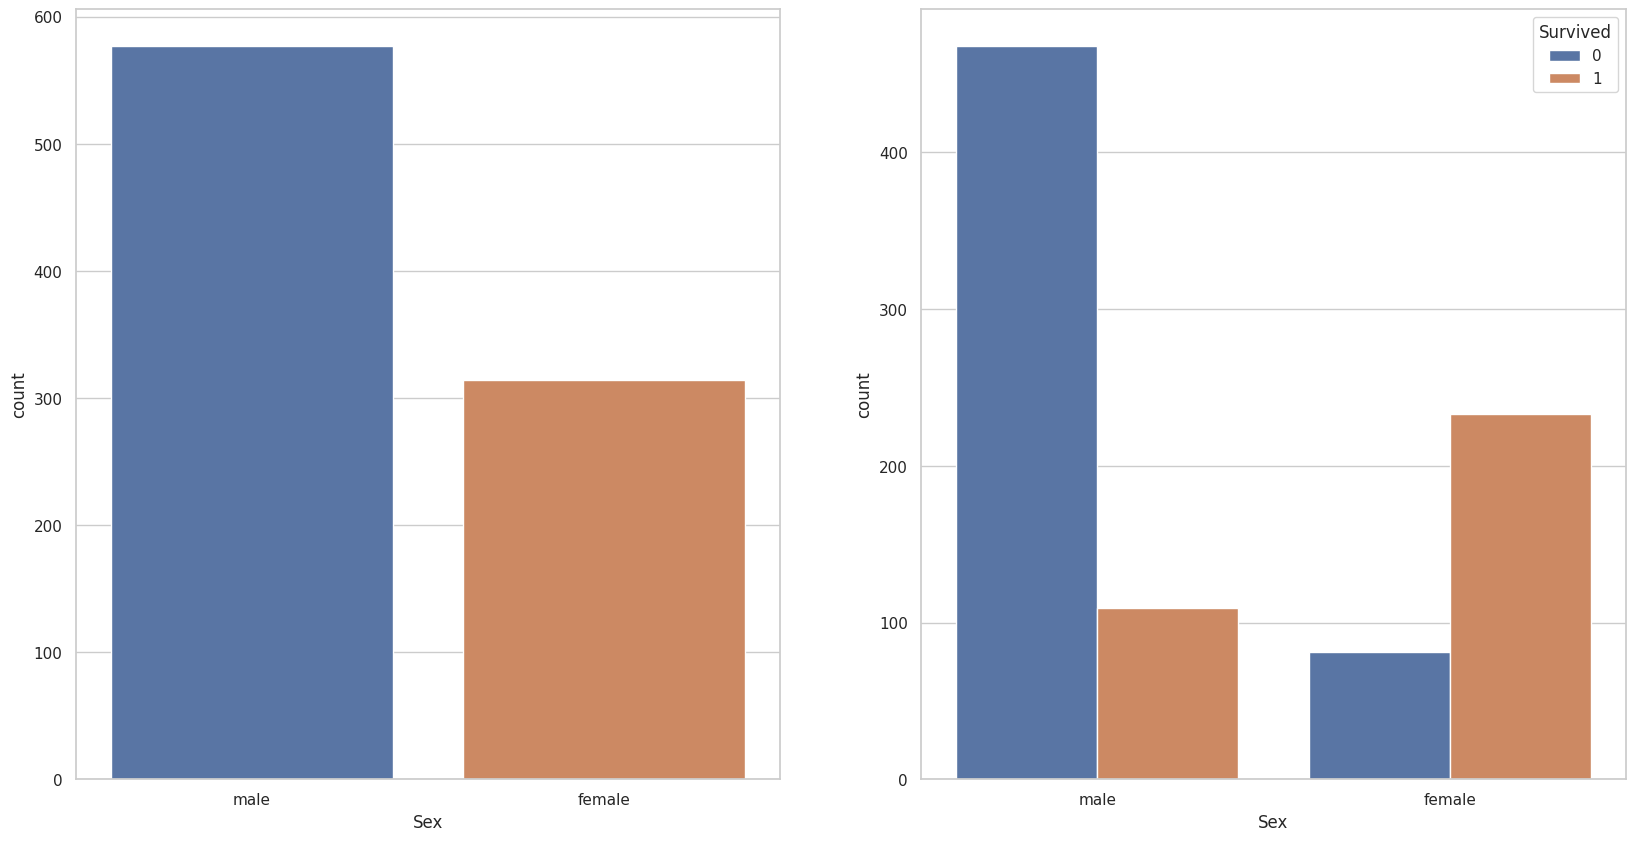

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


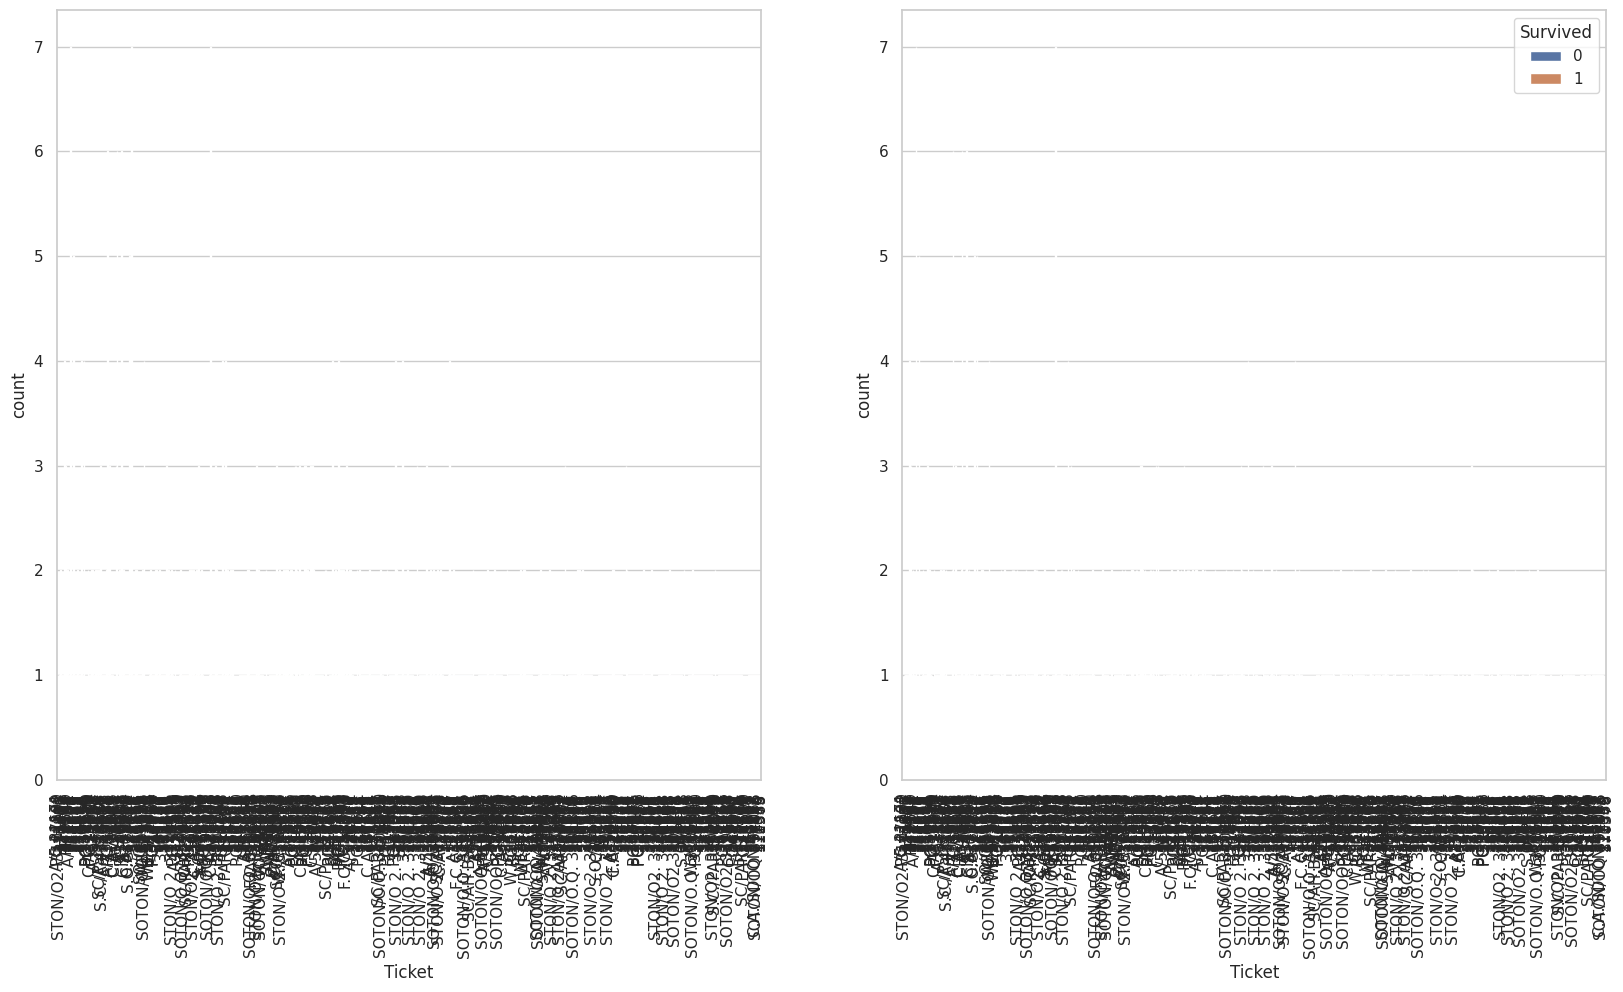

In [16]:
for column_name in categorical_columns:
    print(train_input[column_name].value_counts())  # What values are there?
    
    plot_count_dist(df=train_input, 
                    label_column="Survived", 
                    target_column=column_name, 
                    figsize=(20, 10), 
                    rotate_xaxis_labels=(column_name in ("Cabin", "Name", "Ticket")))

Cabin, Name, and Ticket graphs are very messy (a double whammy for Cabin given roughly 75% of the Cabin data is missing).

This is an area where we may want to do some feature engineering!

In [17]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(data=train_input, index="Survived", columns="Embarked", values="Name", aggfunc="count"))
print()
print(pd.pivot_table(data=train_input, index="Survived", columns="Pclass", values="Name", aggfunc="count"))
print()
print(pd.pivot_table(data=train_input, index="Survived", columns="Sex", values="Name", aggfunc="count"))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109


## Feature Engineering 
### 1) Cabin - Simplify cabins to determine if it impacted survival
> ####   a) Cabin is not missing (HasCabin)
> ####   b) Purchase of multiple cabins (CabinCount)
> ####   c) Cabin deck (CabinDeck)

### 2) Name - Does a person's title (or title significance) relate to survival rates? 

### 3) Tickets - Do different ticket types impact survival rates?



In [18]:
def extract_deck(cabin: str) -> str:
    """
    Function to extract the deck from a cabin.
    ::param_cabin:: = cabin from which you want to extract the deck
    """
    # Handle the case of missing cabins
    if pd.isna(cabin):
        deck = "NaN"

    # Handle the case of irregularly-named cabins/decks
    elif len(cabin) > 2 and cabin[0] == "F" and cabin[2] in ("E", "G"):
        deck = cabin[0:3]

    else:
        deck = cabin[0]
        
    return deck

HasCabin
0    687
1    204
Name: count, dtype: int64


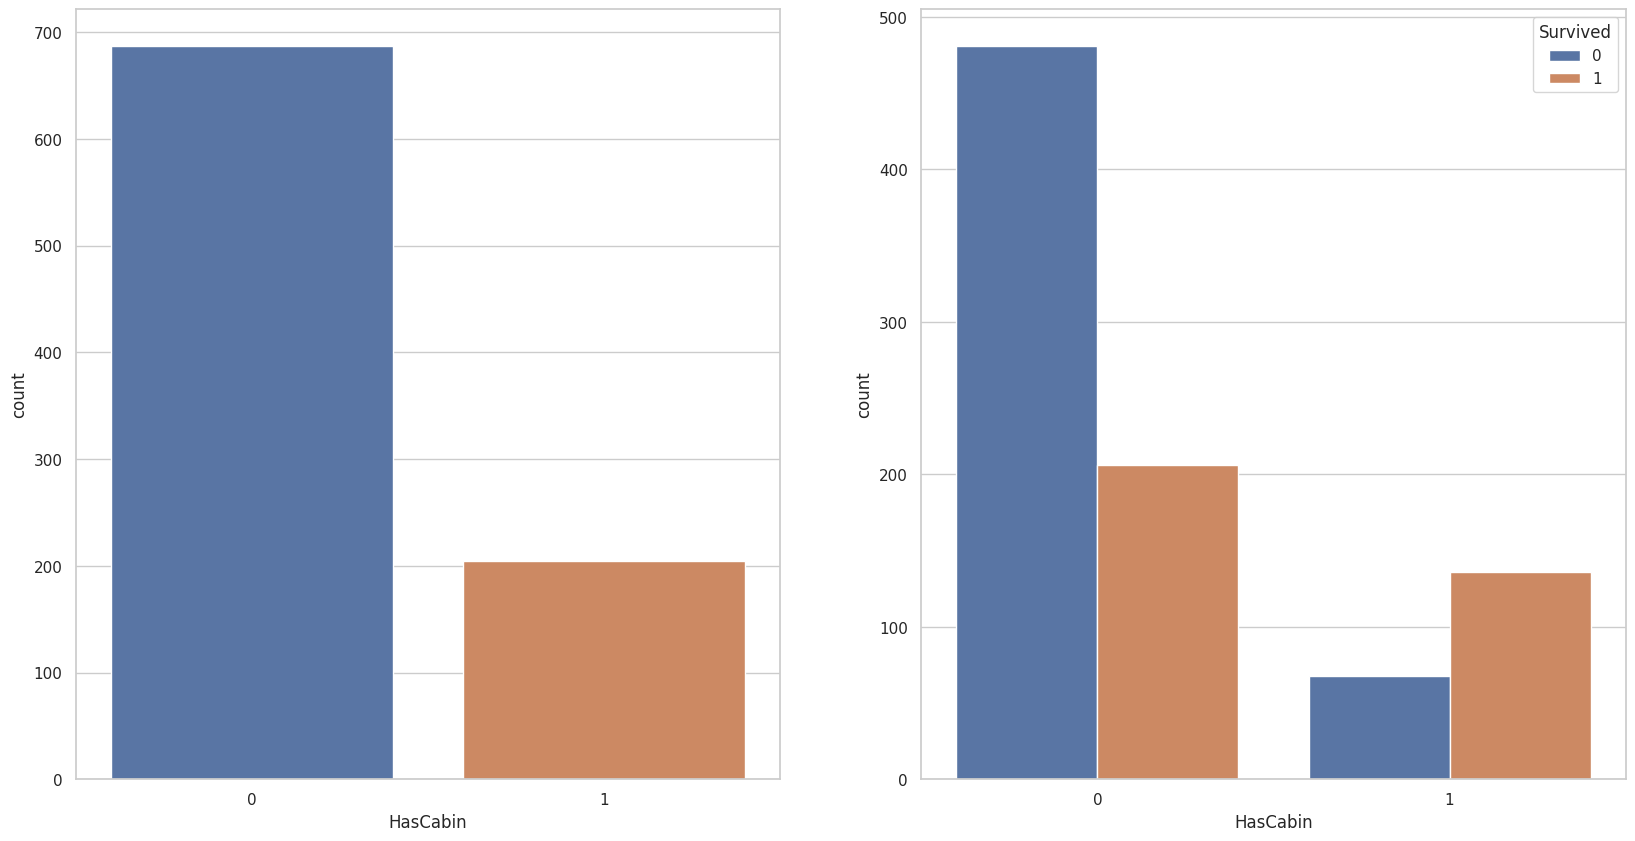

CabinCount
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64


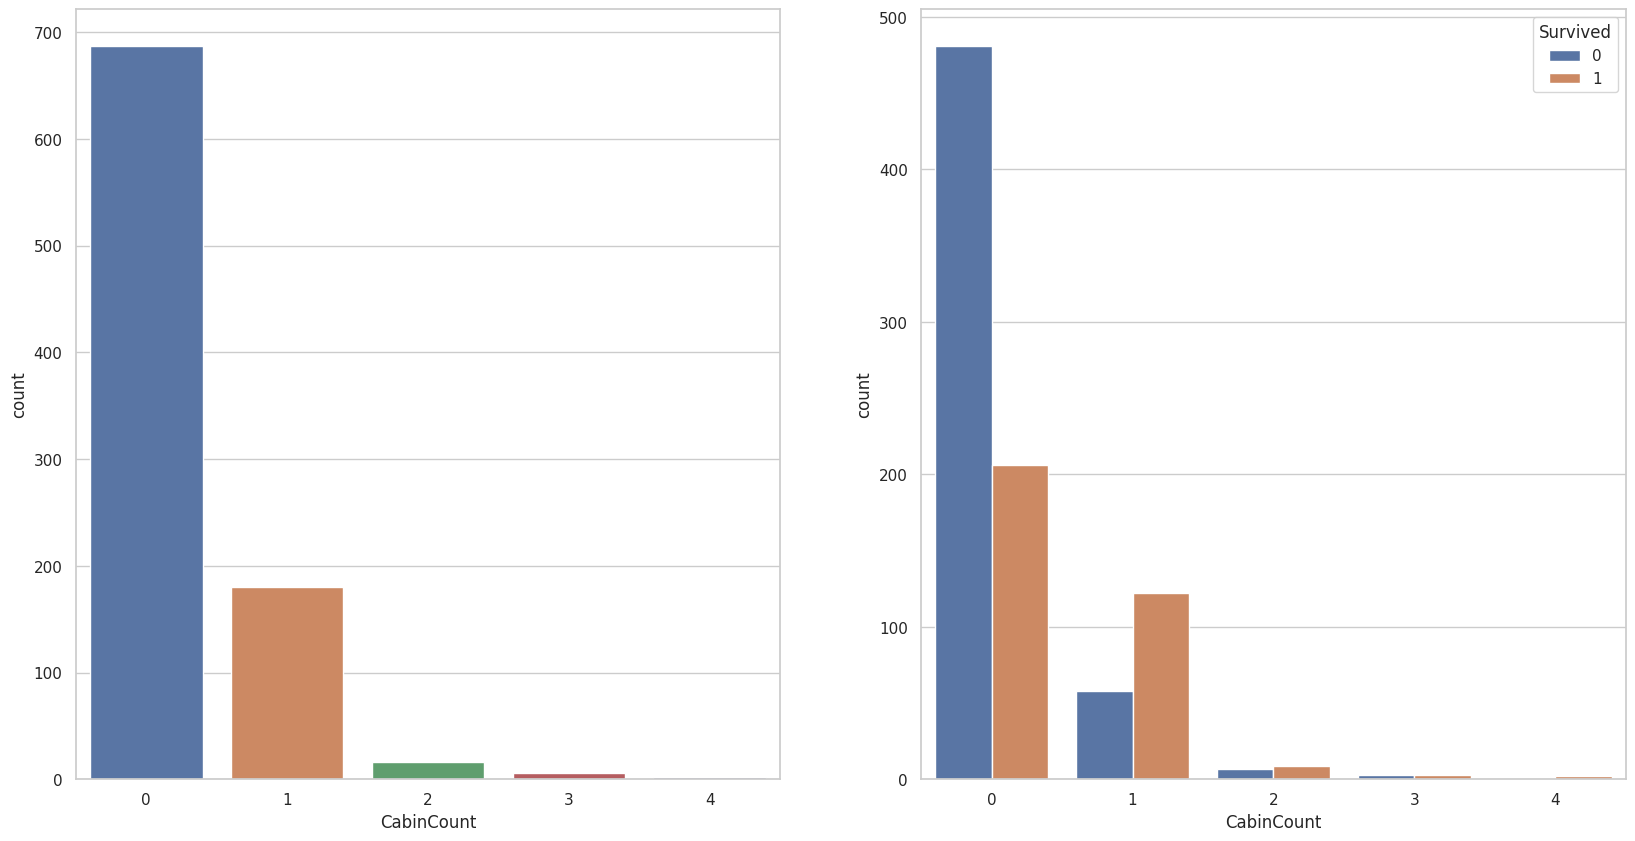

CabinDeck
NaN    687
C       59
B       47
D       33
E       32
A       15
F        9
G        4
F G      3
F E      1
T        1
Name: count, dtype: int64


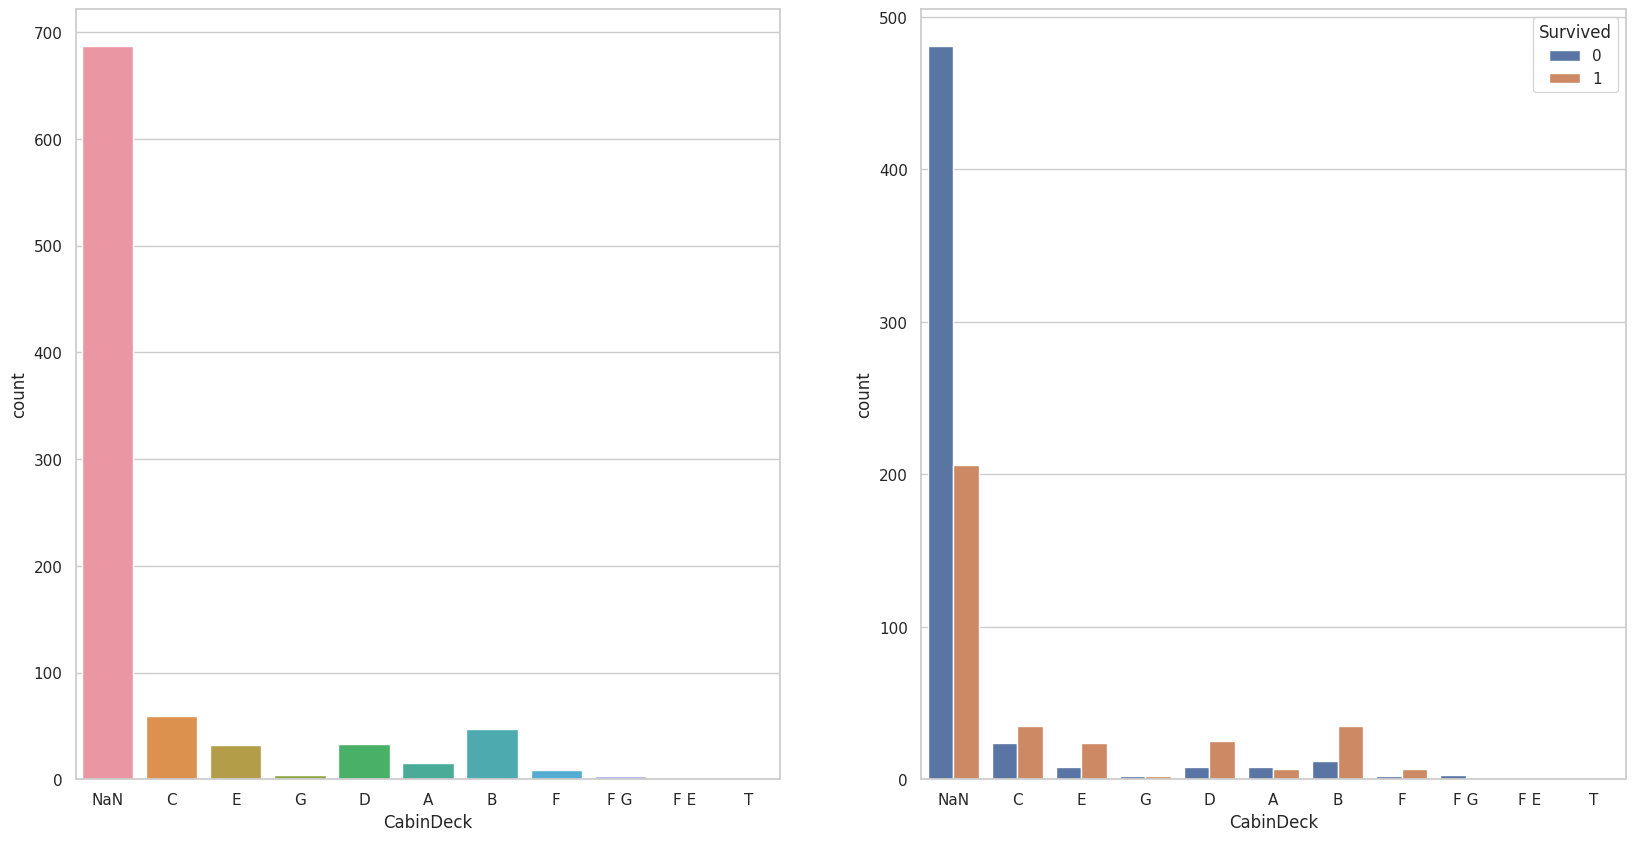

In [19]:
train_input["HasCabin"] = train_input["Cabin"].notna().astype(int)
print(train_input["HasCabin"].value_counts())  # What values are there?

plot_count_dist(df=train_input, 
                label_column="Survived", 
                target_column="HasCabin", 
                figsize=(20, 10), 
                rotate_xaxis_labels=False)

# --------------------------------------------

train_input["CabinCount"] = train_input["Cabin"].apply(lambda cabin: 0 if pd.isna(cabin) else len(cabin.split(" ")))  # multiple cabins
print(train_input["CabinCount"].value_counts())  # What values are there?

plot_count_dist(df=train_input, 
                label_column="Survived", 
                target_column="CabinCount", 
                figsize=(20, 10), 
                rotate_xaxis_labels=False)

# --------------------------------------------

train_input["CabinDeck"] = train_input["Cabin"].apply(extract_deck)  # Create categories based on the cabin prefix (NaN stands for null)
print(train_input["CabinDeck"].value_counts())  # What values are there?

plot_count_dist(df=train_input, 
                label_column="Survived", 
                target_column="CabinDeck", 
                figsize=(20, 10), 
                rotate_xaxis_labels=False)

In [20]:
# Comparing survival rate by each of these variables 
print(pd.pivot_table(data=train_input, index="Survived", columns="HasCabin", values="Name", aggfunc="count"))
print()
print(pd.pivot_table(data=train_input, index="Survived", columns="CabinCount", values="Name", aggfunc="count"))
print()
print(pd.pivot_table(data=train_input, index="Survived", columns="CabinDeck", values="Name", aggfunc="count"))

HasCabin    0    1
Survived          
0         481   68
1         206  136

CabinCount      0      1    2    3    4
Survived                               
0           481.0   58.0  7.0  3.0  NaN
1           206.0  122.0  9.0  3.0  2.0

CabinDeck    A     B     C     D     E    F  F E  F G    G    NaN    T
Survived                                                              
0          8.0  12.0  24.0   8.0   8.0  2.0  NaN  3.0  2.0  481.0  1.0
1          7.0  35.0  35.0  25.0  24.0  7.0  1.0  NaN  2.0  206.0  NaN


In [21]:
def extract_name_prefix(name: str) -> str:
    """
    Function to extract a person's prefix from their name.
    ::param_name:: = name from which you want to extract the prefix
    """
    name = name.split(", ", maxsplit=1)[1]
    name = name.split(".", maxsplit=1)[0]
    return name

In [22]:
def extract_name_significance(name_title: str) -> str:
    """
    Function to ascribe a significance to a person's title.
    ::param_name_title:: = name_title for which you want to determine significance 
    """
    if name_title in ("Don", "Dona", "Jonkheer", "Lady", "Sir", "the Countess"):
        return "Royalty"

    elif name_title in ("Capt", "Col", "Major"):
        return "Military"

    else:
        return "Civilian"

NameTitle
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


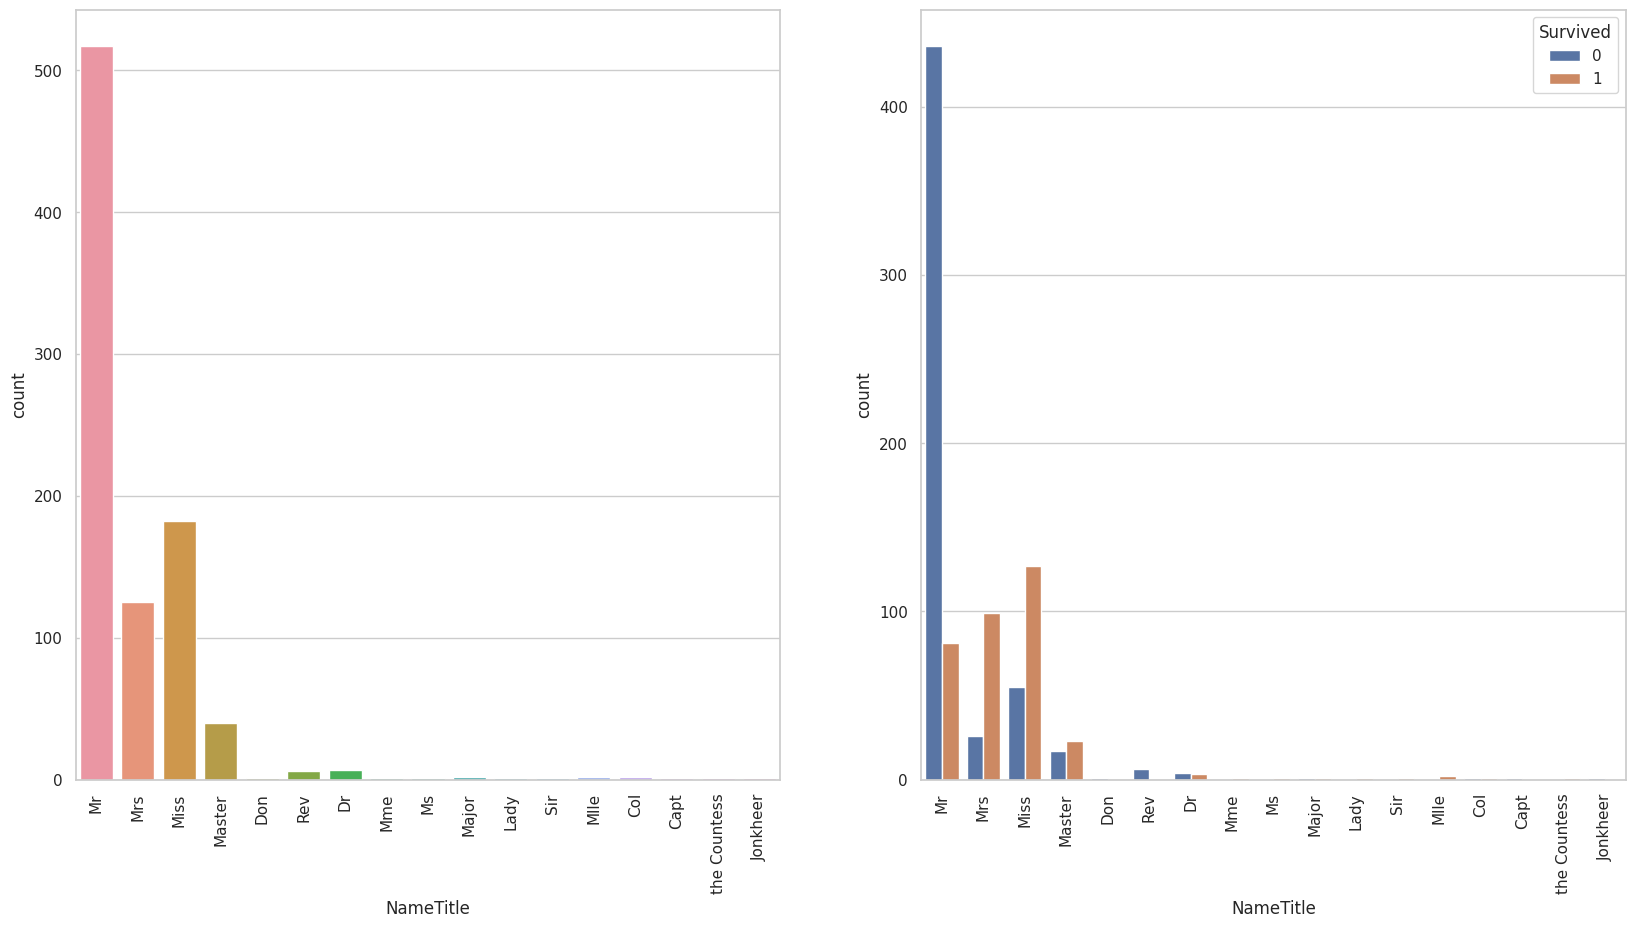

NameSignificance
Civilian    881
Royalty       5
Military      5
Name: count, dtype: int64


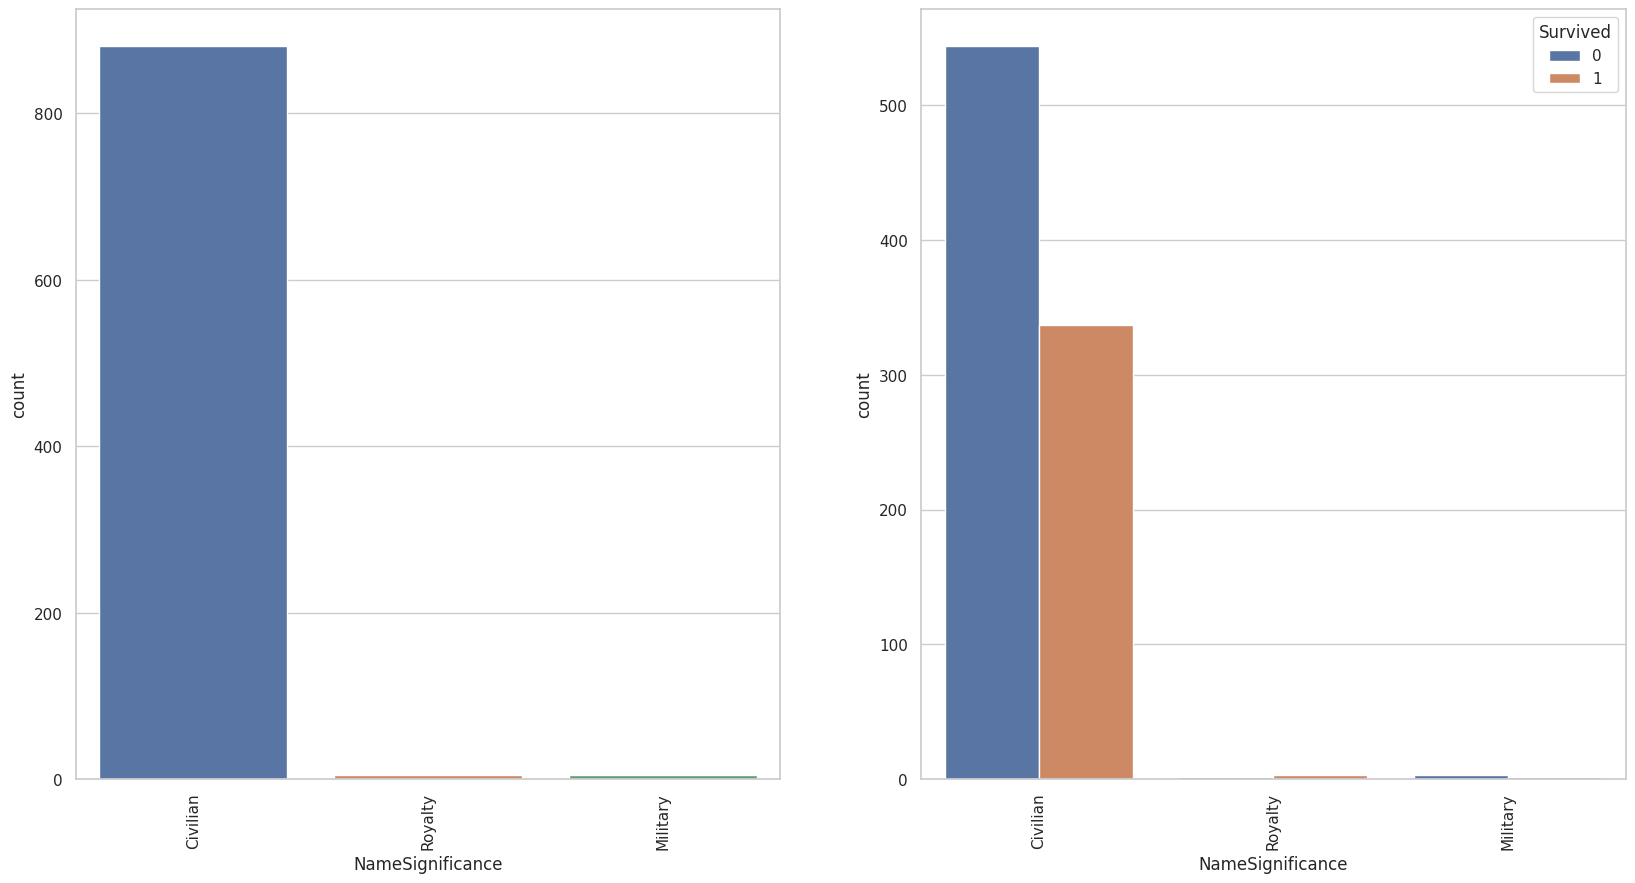

In [23]:
train_input["NameTitle"] = train_input["Name"].apply(extract_name_prefix)  # Feature engineering on person's title (e.g., mr., ms., master., etc.)
print(train_input["NameTitle"].value_counts())

plot_count_dist(df=train_input, 
                label_column="Survived", 
                target_column="NameTitle", 
                figsize=(20, 10), 
                rotate_xaxis_labels=True)

# --------------------------------------------

train_input["NameSignificance"] = train_input["NameTitle"].apply(extract_name_significance)  # Feature engineering on person's title significance
print(train_input["NameSignificance"].value_counts())

plot_count_dist(df=train_input, 
                label_column="Survived", 
                target_column="NameSignificance", 
                figsize=(20, 10), 
                rotate_xaxis_labels=True)

In [24]:
# Comparing survival rate by each of these variables
print(pd.pivot_table(data=train_input, index="Survived", columns="NameTitle", values="Name", aggfunc="count"))
print()
print(pd.pivot_table(data=train_input, index="Survived", columns="NameSignificance", values="Name", aggfunc="count"))

NameTitle  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  Mme     Mr   Mrs   Ms  Rev  Sir  the Countess
Survived                                                                                                                 
0           1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN  NaN  436.0  26.0  NaN  6.0  NaN           NaN
1           NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0  1.0   81.0  99.0  1.0  NaN  1.0           1.0

NameSignificance  Civilian  Military  Royalty
Survived                                     
0                      544         3        2
1                      337         2        3


In [25]:
def extract_ticket_prefix(ticket: str) -> str:
    """
    Function to extract the prefix from a ticket (and convert it to uppercase)
    ::param_ticket:: = ticket from which you want to extract the prefix
    """
    ticket_prefix = ""

    # If a ticket is numeric, there is no prefix
    if not ticket.isnumeric():
        # If a ticket has no spaces, then the whole ticket is a prefix
        if " " not in ticket:
            ticket_prefix  = ticket.upper()

        # Extract the prefix, scrubbing out special characters and correcting suspected typos
        else:
            ticket_prefix = "".join(ticket.split(" ")[0:-1]).replace(".", "").replace("/", "").upper()

            if ticket_prefix == "AS":
                ticket_prefix = "A5"
            
            elif ticket_prefix == "SOTONO2":
                ticket_prefix = "STONO2"

            elif ticket_prefix == "STONOQ":
                ticket_prefix = "SOTONOQ"

    return ticket_prefix

NumericTicket
1    661
0    230
Name: count, dtype: int64


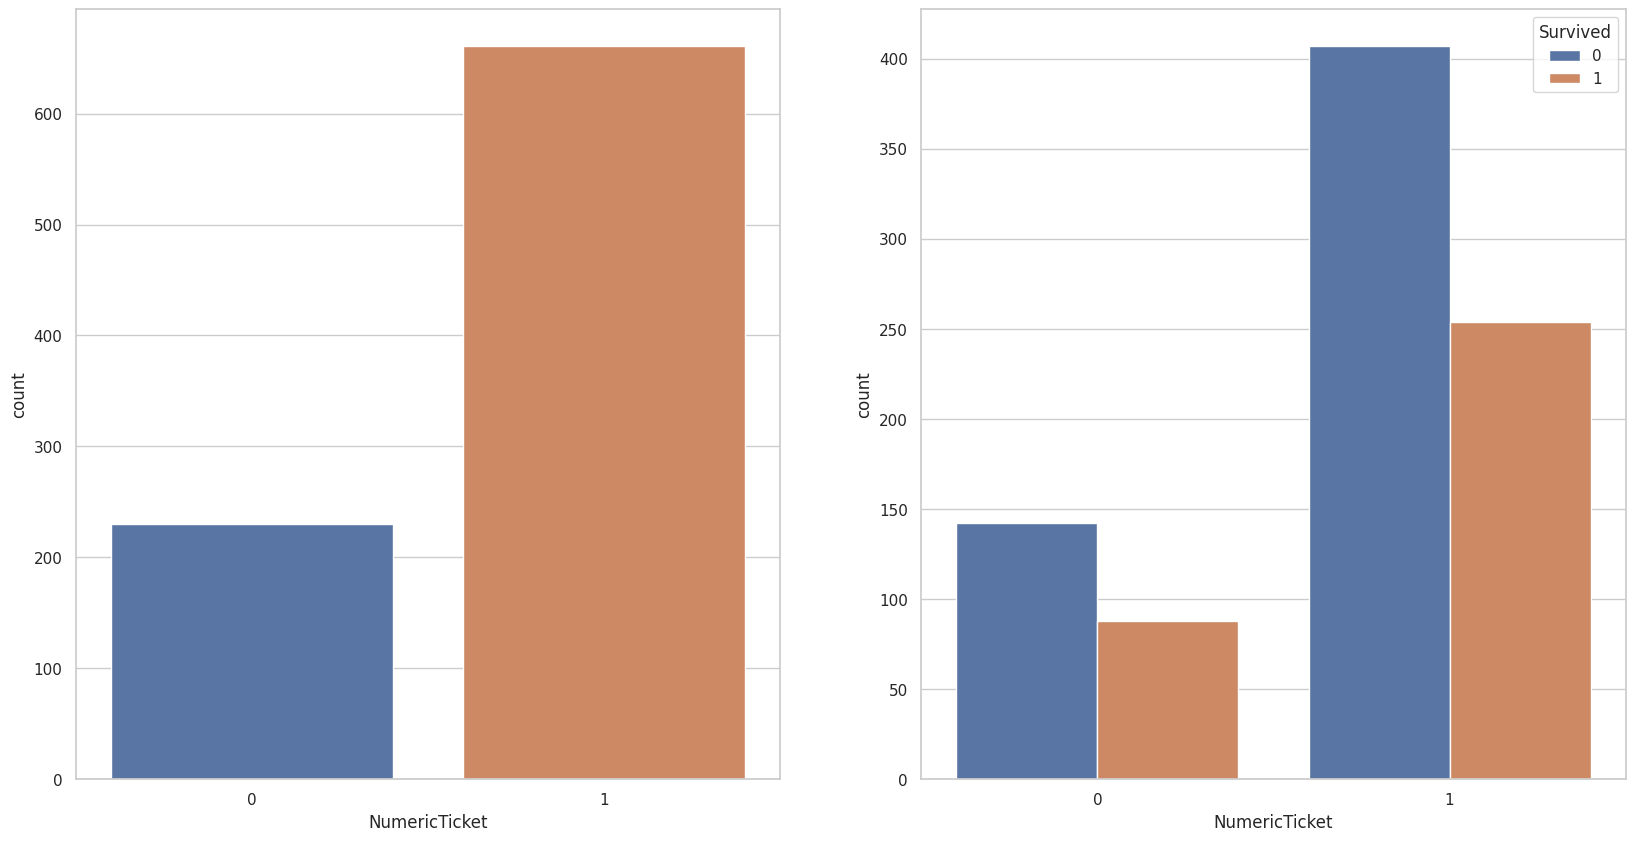

TicketPrefix
             661
PC            60
CA            41
A5            22
STONO2        20
SOTONOQ       15
SCPARIS       11
WC            10
A4             7
SOC            6
FCC            5
C              5
LINE           4
WEP            3
PP             3
SOPP           3
SWPP           2
PPP            2
SCAH           2
SP             1
SCA4           1
SOP            1
FA             1
SCOW           1
SC             1
SCAHBASLE      1
FC             1
CASOTON        1
Name: count, dtype: int64


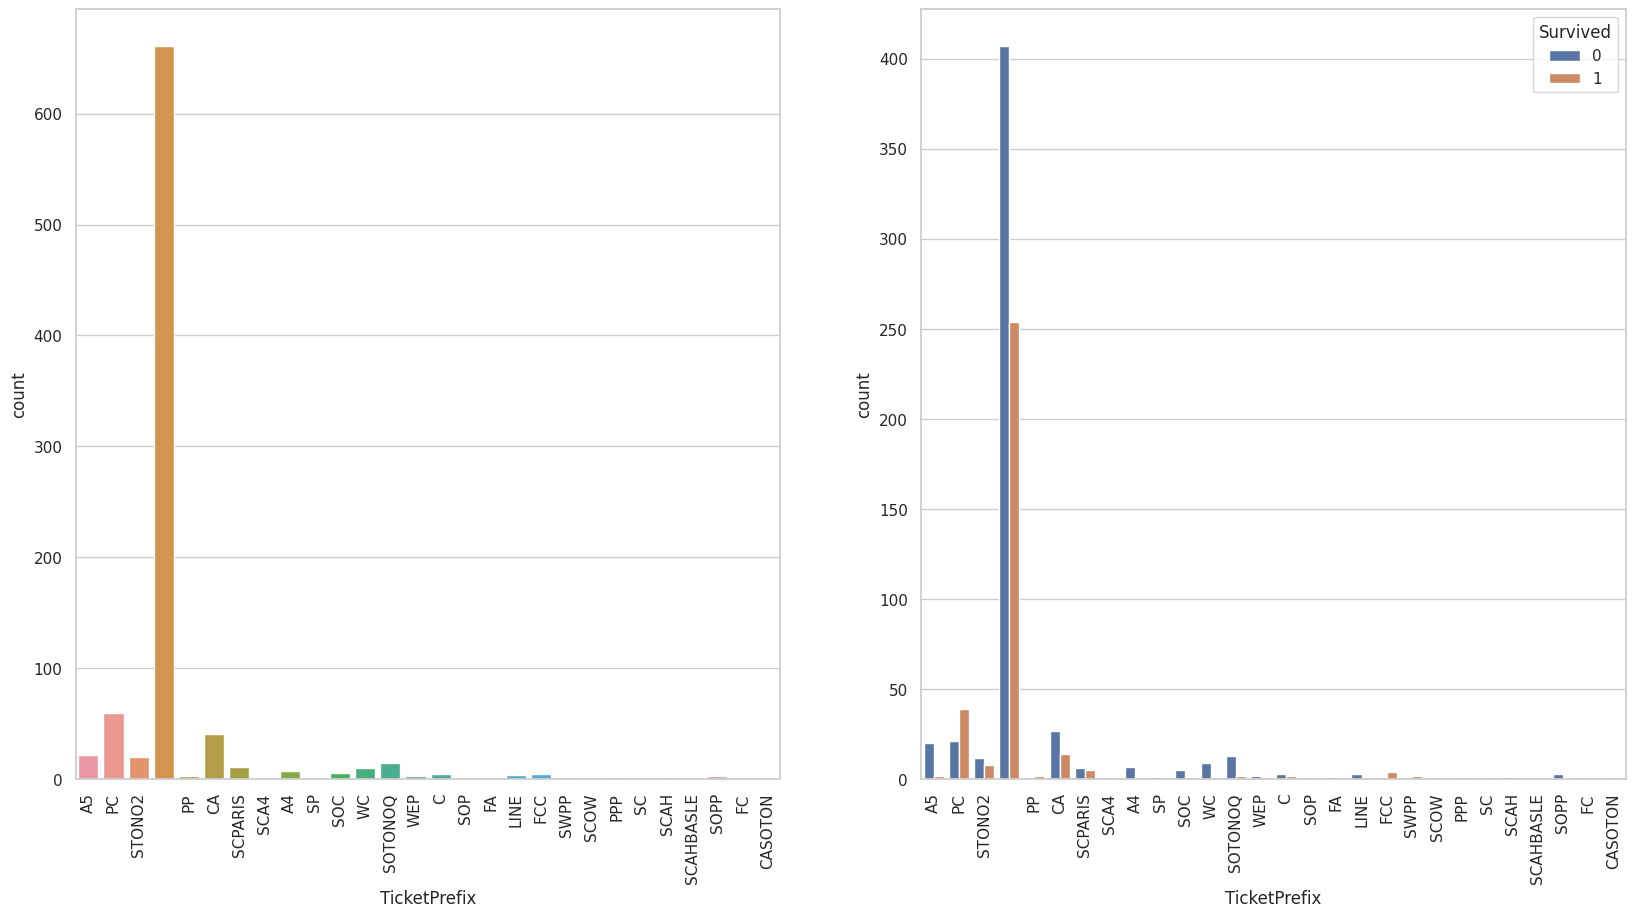

In [26]:
train_input["NumericTicket"] = train_input["Ticket"].apply(lambda ticket: int(ticket.isnumeric()))  # Understand numeric vs non-numeric
print(train_input["NumericTicket"].value_counts())

plot_count_dist(df=train_input, 
                label_column="Survived", 
                target_column="NumericTicket", 
                figsize=(20, 10), 
                rotate_xaxis_labels=False)

# --------------------------------------------

train_input["TicketPrefix"] = train_input["Ticket"].apply(extract_ticket_prefix)  # Understand ticket prefixes
print(train_input["TicketPrefix"].value_counts())

plot_count_dist(df=train_input, 
                label_column="Survived", 
                target_column="TicketPrefix", 
                figsize=(20, 10), 
                rotate_xaxis_labels=True)

In [27]:
# Survival rate across different ticket types 
pd.pivot_table(data=train_input, index="Survived", columns=["NumericTicket", "TicketPrefix"], values="Name", aggfunc="count")

NumericTicket    0                                                                                                                                                           1
TicketPrefix    A4    A5    C    CA CASOTON   FA   FC  FCC LINE    PC   PP  PPP   SC SCA4 SCAH SCAHBASLE SCOW SCPARIS  SOC  SOP SOPP SOTONOQ   SP STONO2 SWPP   WC  WEP       
Survived                                                                                                                                                                      
0              7.0  20.0  3.0  27.0     1.0  1.0  1.0  1.0  3.0  21.0  1.0  1.0  NaN  1.0  1.0       NaN  1.0     6.0  5.0  1.0  3.0    13.0  1.0   12.0  NaN  9.0  2.0  407.0
1              NaN   2.0  2.0  14.0     NaN  NaN  NaN  4.0  1.0  39.0  2.0  1.0  1.0  NaN  1.0       1.0  NaN     5.0  1.0  NaN  NaN     2.0  NaN    8.0  2.0  1.0  1.0  254.0

## Feature Encoding
### 1) Impute missing data for Embarked and Fare using most common values
### 2) Normalize Fare using logarithm to give more semblance of a normal distribution
### 2) Encode features using OneHotEncoder
### 3) Drop irrelevant variables
Variables: "PassengerId", "Embarked", "Name", "Ticket", "Cabin", "Sex", "Fare", "Pclass", "HasCabin", "CabinCount", "CabinDeck", "NameTitle", "NameSignificance", "NumericTicket", "TicketPrefix"
### 4) Impute Age in Training and Test datasets with CatBoostRegressor
### 5) Scale data 0-1 with StandardScaler

In [28]:
class EmbarkedImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["Embarked"] = X["Embarked"].fillna("S")  # Impute nulls using most common value. Only 2 instances of this in training and 0 in test 
        return X

In [29]:
# One-hot encode columns and combine them for our machine learning algorithm
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder(sparse=False, dtype=int)
        fields = ["Embarked", "Sex", "Pclass", "CabinCount", "CabinDeck", "NameTitle", "NameSignificance", "TicketPrefix"]

        for field in fields:
            matrix = encoder.fit_transform(X[[field]])
            encoded_df = pd.DataFrame(matrix, columns=encoder.get_feature_names_out([field]), index=X.index)
            X = pd.concat([X, encoded_df], axis=1)

        return X

In [30]:
# Drop columns
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["PassengerId", "Embarked", "Name", "Ticket", "Cabin", "Sex", "Fare", "Pclass", "HasCabin", "CabinCount", "CabinDeck", "NameTitle", "NameSignificance", "NumericTicket", "TicketPrefix"], axis=1, errors="ignore")

In [31]:
pipeline = Pipeline([("embarked_imputer", EmbarkedImputer()), 
                     ("feature_encoder", FeatureEncoder()), 
                     ("feature_dropper", FeatureDropper())])

NormFare
2.202765    61
2.639057    59
2.169054    55
3.295837    50
2.185579    49
            ..
2.168105     1
2.214661     1
2.246893     1
2.174752     1
2.165711     1
Name: count, Length: 281, dtype: int64


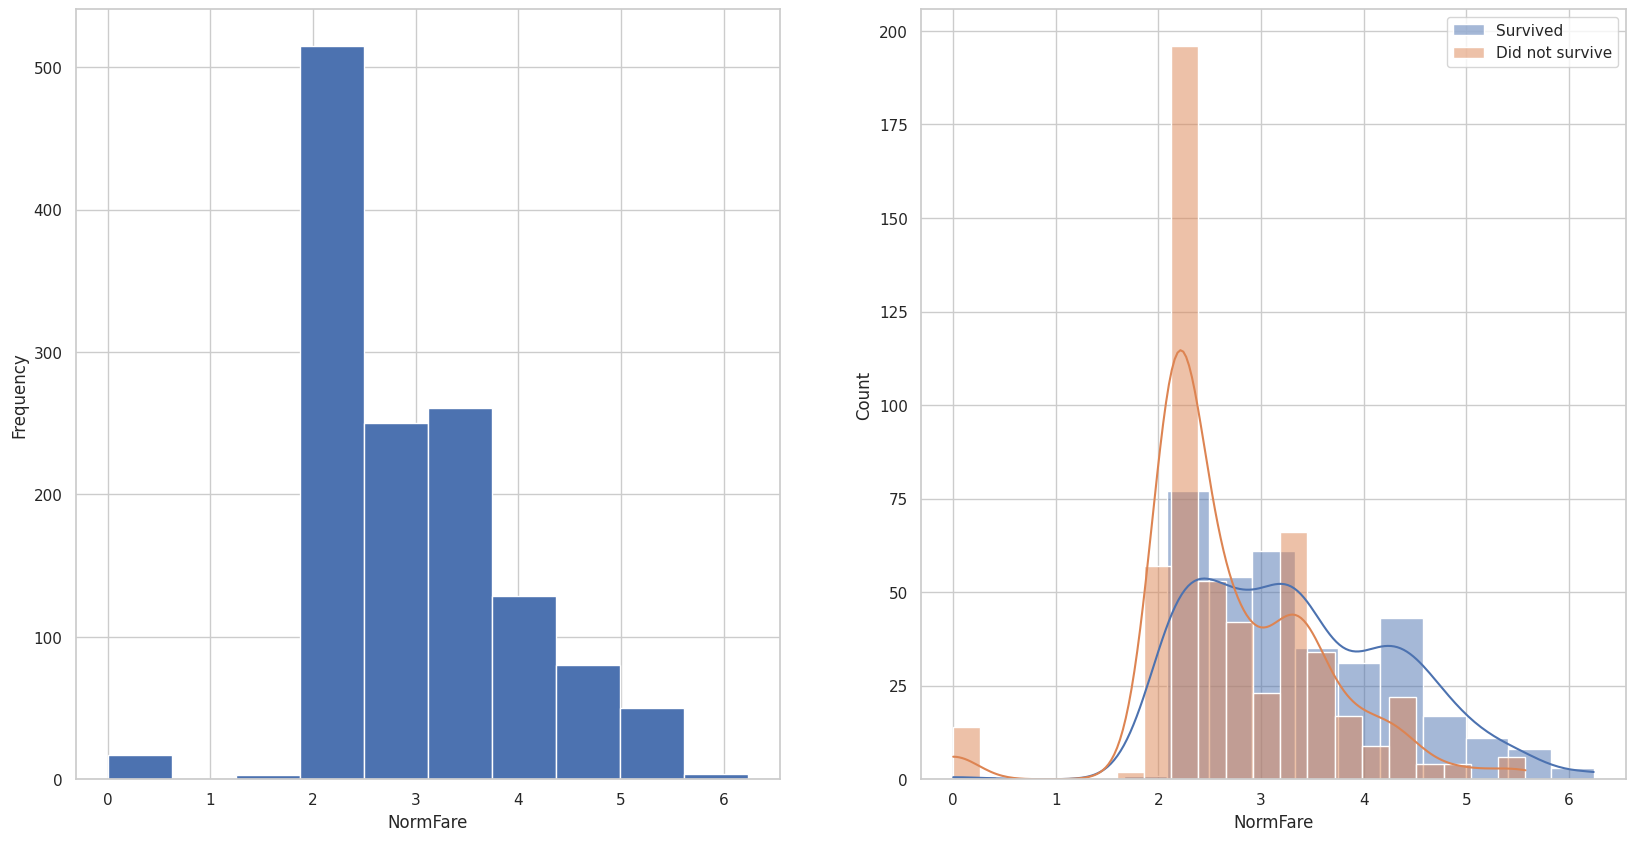

In [32]:
# Create all categorical variables that we did above for both training and test sets 
all_data["HasCabin"] = all_data["Cabin"].notna().astype(int)

all_data["CabinCount"] = all_data["Cabin"].apply(lambda cabin: 0 if pd.isna(cabin) else len(cabin.split(" ")))

all_data["CabinDeck"] = all_data["Cabin"].apply(extract_deck)

all_data["NameTitle"] = all_data["Name"].apply(extract_name_prefix)

all_data["NameSignificance"] = all_data["NameTitle"].apply(extract_name_significance)

all_data["NumericTicket"] = all_data["Ticket"].apply(lambda ticket: int(ticket.isnumeric()))

all_data["TicketPrefix"] = all_data["Ticket"].apply(extract_ticket_prefix)

all_data["Fare"] = all_data["Fare"].fillna(8.05)  # Impute nulls using most common value. 0 instances of this in training and only 1 in test
all_data["NormFare"] = np.log(all_data["Fare"] + 1)  # log norm of Fare
print(all_data["NormFare"].value_counts())  # What values are there?
plot_hist_dist(df=all_data, 
               label_column="Survived", 
               target_column="NormFare", 
               figsize=(20, 10), 
               discrete=False, 
               rotate_xaxis_labels=False)

all_data = pipeline.fit_transform(all_data)

### Age Imputation
We want to fill in missing age data instead of just dropping the missing age data rows. 

We'll run two models to predict Ages for training and test data, as different information can be used to inform each respective model...

Start by making a copy of your combined **training + test data** and scale it 0-1 with StandardScaler.

In [33]:
# Scale data for Age imputation. We will do a final scale later!
scale = StandardScaler()
all_data_scaled = all_data.copy()
all_data_scaled[["NormFare", "Parch", "SibSp"]] = scale.fit_transform(all_data_scaled[["NormFare", "Parch", "SibSp"]])
all_data_scaled

,Survived,Age,SibSp,Parch,IsTrain,NormFare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,CabinCount_0,CabinCount_1,CabinCount_2,CabinCount_3,CabinCount_4,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_F E,CabinDeck_F G,CabinDeck_G,CabinDeck_NaN,CabinDeck_T,NameTitle_Capt,NameTitle_Col,NameTitle_Don,NameTitle_Dona,NameTitle_Dr,NameTitle_Jonkheer,NameTitle_Lady,NameTitle_Major,NameTitle_Master,NameTitle_Miss,NameTitle_Mlle,NameTitle_Mme,NameTitle_Mr,NameTitle_Mrs,NameTitle_Ms,NameTitle_Rev,NameTitle_Sir,NameTitle_the Countess,NameSignificance_Civilian,NameSignificance_Military,NameSignificance_Royalty,TicketPrefix_,TicketPrefix_A2,TicketPrefix_A4,TicketPrefix_A5,TicketPrefix_AQ3,TicketPrefix_AQ4,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_CASOTON,TicketPrefix_FA,TicketPrefix_FC,TicketPrefix_FCC,TicketPrefix_LINE,TicketPrefix_LP,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_PPP,TicketPrefix_SC,TicketPrefix_SCA3,TicketPrefix_SCA4,TicketPrefix_SCAH,TicketPrefix_SCAHBASLE,TicketPrefix_SCOW,TicketPrefix_SCPARIS,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOPP,TicketPrefix_SOTONOQ,TicketPrefix_SP,TicketPrefix_STONO2,TicketPrefix_SWPP,TicketPrefix_WC,TicketPrefix_WEP
0,0.0,22.0,0.481288,-0.445000,1,-0.897165,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,38.0,0.481288,-0.445000,1,1.344579,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,26.0,-0.479087,-0.445000,1,-0.815936,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,35.0,0.481288,-0.445000,1,1.045293,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,35.0,-0.479087,-0.445000,1,-0.801570,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,-0.479087,-0.445000,0,-0.801570,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1305,NaN,39.0,-0.479087,-0.445000,0,1.777333,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1306,NaN,38.5,-0.479087,-0.445000,0,-0.897165,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1307,NaN,NaN,-0.479087,-0.445000,0,-0.801570,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Age Imputation: Training Data
Impute missing Age for **training data <u>only</u>** so that Survived can be used to aid in prediction

In [34]:
# Split the dataframe
X_train = all_data_scaled[all_data_scaled["IsTrain"] == 1]
X_train = X_train.dropna(subset=["Age"])
X_train["Survived"] = X_train["Survived"].astype(int)  # Downcast Survived to an int as it no longer contains NaN

y_train = X_train["Age"]
X_train = X_train.drop(["IsTrain", "Age"], axis=1)
y_train

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [35]:
# Define the categorical features for the CatBoost model
categorical_features = np.where(X_train.dtypes != float)[0]
categorical_features

array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

This means Catboost has picked up that all variables except SibSp, Parch, and NormFare can be treated as categorical.

In [36]:
train_pool = Pool(X_train, y_train, categorical_features)

In [37]:
# CatBoost model definition
catboost_model = CatBoostRegressor(iterations=1000, eval_metric="R2", loss_function="RMSE")

# Fit CatBoost model
catboost_model.fit(train_pool, verbose=100)

# CatBoost R2
r2_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

Learning rate set to 0.038821
0:	learn: 0.0304466	total: 54.2ms	remaining: 54.2s
100:	learn: 0.4983461	total: 194ms	remaining: 1.72s
200:	learn: 0.5558354	total: 328ms	remaining: 1.3s
300:	learn: 0.6031224	total: 461ms	remaining: 1.07s
400:	learn: 0.6342083	total: 593ms	remaining: 886ms
500:	learn: 0.6585329	total: 727ms	remaining: 724ms
600:	learn: 0.6778045	total: 863ms	remaining: 573ms
700:	learn: 0.6947727	total: 998ms	remaining: 426ms
800:	learn: 0.7118333	total: 1.13s	remaining: 282ms
900:	learn: 0.7239604	total: 1.27s	remaining: 139ms
999:	learn: 0.7357859	total: 1.4s	remaining: 0us


In [38]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds
cv_data = cv(train_pool, cv_params, fold_count=10, verbose=1000)

# How long did it take?
catboost_time = time.time() - start_time

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum R2 score
r2_cv_catboost = round(np.max(cv_data["test-R2-mean"]) * 100, 2)  # Cross-validation R2 metric

Training on fold [0/10]
0:	learn: -3.9560898	test: -3.8575687	best: -3.8575687 (0)	total: 2.39ms	remaining: 2.39s
999:	learn: 0.7132192	test: 0.4847406	best: 0.4849818 (998)	total: 1.62s	remaining: 0us

bestTest = 0.4849817739
bestIteration = 998

Training on fold [1/10]
0:	learn: -3.9677665	test: -3.8538817	best: -3.8538817 (0)	total: 1.91ms	remaining: 1.91s
999:	learn: 0.7210599	test: 0.4055593	best: 0.4487835 (109)	total: 1.51s	remaining: 0us

bestTest = 0.4487835407
bestIteration = 109

Training on fold [2/10]
0:	learn: -3.8303350	test: -5.0616101	best: -5.0616101 (0)	total: 1.59ms	remaining: 1.59s
999:	learn: 0.7238409	test: 0.3478024	best: 0.4150913 (241)	total: 1.49s	remaining: 0us

bestTest = 0.4150912598
bestIteration = 241

Training on fold [3/10]
0:	learn: -3.9624006	test: -3.7790251	best: -3.7790251 (0)	total: 1.92ms	remaining: 1.92s
999:	learn: 0.7202483	test: 0.4030030	best: 0.4241957 (431)	total: 1.49s	remaining: 0us

bestTest = 0.4241956535
bestIteration = 431

Training

In [39]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("R2: " + str(r2_catboost))
print("R2 cross-validation 10-Fold: " + str(r2_cv_catboost))
print("Running Time: " + str(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
R2: 73.58
R2 cross-validation 10-Fold: 41.61
Running Time: 0:00:16.724145


In [40]:
X_test = all_data_scaled[all_data_scaled["IsTrain"] == 1]
X_test = X_test[X_test["Age"].isna()]
X_test["Survived"] = X_test["Survived"].astype(int)  # Downcast Survived to an int as it no longer contains NaN

X_test = X_test.drop(["IsTrain", "Age"], axis=1)
X_test

,Survived,SibSp,Parch,NormFare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,CabinCount_0,CabinCount_1,CabinCount_2,CabinCount_3,CabinCount_4,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_F E,CabinDeck_F G,CabinDeck_G,CabinDeck_NaN,CabinDeck_T,NameTitle_Capt,NameTitle_Col,NameTitle_Don,NameTitle_Dona,NameTitle_Dr,NameTitle_Jonkheer,NameTitle_Lady,NameTitle_Major,NameTitle_Master,NameTitle_Miss,NameTitle_Mlle,NameTitle_Mme,NameTitle_Mr,NameTitle_Mrs,NameTitle_Ms,NameTitle_Rev,NameTitle_Sir,NameTitle_the Countess,NameSignificance_Civilian,NameSignificance_Military,NameSignificance_Royalty,TicketPrefix_,TicketPrefix_A2,TicketPrefix_A4,TicketPrefix_A5,TicketPrefix_AQ3,TicketPrefix_AQ4,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_CASOTON,TicketPrefix_FA,TicketPrefix_FC,TicketPrefix_FCC,TicketPrefix_LINE,TicketPrefix_LP,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_PPP,TicketPrefix_SC,TicketPrefix_SCA3,TicketPrefix_SCA4,TicketPrefix_SCAH,TicketPrefix_SCAHBASLE,TicketPrefix_SCOW,TicketPrefix_SCPARIS,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOPP,TicketPrefix_SOTONOQ,TicketPrefix_SP,TicketPrefix_STONO2,TicketPrefix_SWPP,TicketPrefix_WC,TicketPrefix_WEP
5,0,-0.479087,-0.445000,-0.755991,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,1,-0.479087,-0.445000,-0.350932,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,1,-0.479087,-0.445000,-0.900299,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0,-0.479087,-0.445000,-0.900299,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,1,-0.479087,-0.445000,-0.821250,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,-0.479087,-0.445000,-0.899772,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
863,0,7.203909,1.866526,1.319510,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
868,0,-0.479087,-0.445000,-0.648073,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
878,0,-0.479087,-0.445000,-0.819320,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# Make a prediction
predictions = catboost_model.predict(X_test)
predictions

array([37.45094426, 33.4717496 , 27.04800973, 32.23336809, 20.01097979,
       28.46656649, 37.94830326, 19.14551181, 21.64843832, 28.5083289 ,
       29.16775008, 33.71830065, 19.14551181, 22.93879604, 41.77583831,
       50.47668444, -0.25075281, 28.46656649, 30.05771329, 19.79079509,
       26.86026201, 30.05771329, 28.46656649, 27.90768572, 17.29354472,
       22.13915379, 42.15988751,  2.30773202, 32.89547821, 30.35170598,
       27.34194472, 11.81640841, 43.68396285, 46.73118043,  4.35269987,
       16.25414789, 29.67108521, 39.24625027, 26.50309689, 42.15988751,
       19.14551181, 21.68835857, 34.19980686, 28.46656649,  6.96433377,
       35.05658686, 18.32544019, 17.32744907, 30.98933137, 47.59397362,
       42.15988751, 29.28282732, 46.27126612, 19.14551181, 31.98390836,
       56.66046822, 50.47668444, 42.26939987, 19.14551181, 26.01150476,
       27.87525451, 33.16264312, 28.22138581, 21.68835857, 15.9065589 ,
       37.50118822, 28.46656649, 28.94771956, 50.13208455, 32.23

In [42]:
# Create a dataframe containing all known + predicted Ages for the training data. 
# If a predicted Age is negative, set it to the smallest observed Age: 0.17
# Otherwise, round to the nearest 0.5 increment, excluding integers; this is the standard convention used to denote estimated Ages
X_train_age = pd.DataFrame()
X_train_age["Age"] = train_input["Age"]
X_train_age.loc[X_train_age["Age"].isnull(), "Age"] =  np.where(predictions < 0, 0.17, np.floor(predictions) + 0.5)
X_train_age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,17.5
889,26.0


#### Age Imputation: Test Data
Train a model on all known ages across **<u>initial</u> training + test** data so that <u>all</u> Age information can be used to aid in prediction of **test** Ages.

In [43]:
# Split the dataframe
X_train = all_data_scaled.copy()
X_train = X_train.dropna(subset=["Age"])

y_train = X_train["Age"]
X_train = X_train.drop(["IsTrain", "Age", "Survived"], axis=1)  # Unlike with the training data, drop Survived as it's not present in test
y_train

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1300     3.0
1302    37.0
1303    28.0
1305    39.0
1306    38.5
Name: Age, Length: 1046, dtype: float64

In [44]:
# Define the categorical features for the CatBoost model
categorical_features = np.where(X_train.dtypes != float)[0]
categorical_features

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

This means Catboost has picked up that all variables except SibSp, Parch, and NormFare can be treated as categorical.

In [45]:
train_pool = Pool(X_train, y_train, categorical_features)

In [46]:
# CatBoost model definition
catboost_model = CatBoostRegressor(iterations=1000, eval_metric="R2", loss_function="RMSE")

# Fit CatBoost model
catboost_model.fit(train_pool, verbose=100)

# CatBoost R2
r2_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

Learning rate set to 0.041235
0:	learn: 0.0298237	total: 1.59ms	remaining: 1.59s
100:	learn: 0.4974528	total: 149ms	remaining: 1.32s
200:	learn: 0.5497416	total: 295ms	remaining: 1.17s
300:	learn: 0.5891004	total: 443ms	remaining: 1.03s
400:	learn: 0.6220397	total: 589ms	remaining: 880ms
500:	learn: 0.6460094	total: 739ms	remaining: 736ms
600:	learn: 0.6641482	total: 888ms	remaining: 590ms
700:	learn: 0.6782387	total: 1.04s	remaining: 443ms
800:	learn: 0.6901613	total: 1.19s	remaining: 296ms
900:	learn: 0.7027357	total: 1.34s	remaining: 147ms
999:	learn: 0.7117368	total: 1.49s	remaining: 0us


In [47]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds
cv_data = cv(train_pool, cv_params, fold_count=10, verbose=1000)

# How long did it take?
catboost_time = time.time() - start_time

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum R2 score
r2_cv_catboost = round(np.max(cv_data["test-R2-mean"]) * 100, 2)  # Cross-validation R2 metric

Training on fold [0/10]
0:	learn: -4.1207350	test: -3.5453143	best: -3.5453143 (0)	total: 2.02ms	remaining: 2.02s
999:	learn: 0.6847666	test: 0.5147306	best: 0.5160013 (973)	total: 1.55s	remaining: 0us

bestTest = 0.5160013235
bestIteration = 973

Training on fold [1/10]
0:	learn: -4.0616627	test: -3.9792453	best: -3.9792453 (0)	total: 1.85ms	remaining: 1.85s
999:	learn: 0.6910232	test: 0.4121103	best: 0.4283774 (481)	total: 1.57s	remaining: 0us

bestTest = 0.428377425
bestIteration = 481

Training on fold [2/10]
0:	learn: -3.9957900	test: -4.4773610	best: -4.4773610 (0)	total: 1.62ms	remaining: 1.62s
999:	learn: 0.6895781	test: 0.4835851	best: 0.4837579 (993)	total: 1.25s	remaining: 0us

bestTest = 0.4837578974
bestIteration = 993

Training on fold [3/10]
0:	learn: -4.2080966	test: -2.9787295	best: -2.9787295 (0)	total: 1.31ms	remaining: 1.3s
999:	learn: 0.6843115	test: 0.5012107	best: 0.5042148 (881)	total: 1.13s	remaining: 0us

bestTest = 0.5042147505
bestIteration = 881

Training o

In [48]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("R2: " + str(r2_catboost))
print("R2 cross-validation 10-Fold: " + str(r2_cv_catboost))
print("Running Time: " + str(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
R2: 71.17
R2 cross-validation 10-Fold: 45.65
Running Time: 0:00:15.852588


In [49]:
X_test = all_data_scaled[all_data_scaled["IsTrain"] == 0]
X_test = X_test[X_test["Age"].isna()]
X_test = X_test.drop(["IsTrain", "Survived", "Age"], axis=1)  # Unlike with the training data, drop Survived as it's not present in test
X_test

,SibSp,Parch,NormFare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,CabinCount_0,CabinCount_1,CabinCount_2,CabinCount_3,CabinCount_4,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_F E,CabinDeck_F G,CabinDeck_G,CabinDeck_NaN,CabinDeck_T,NameTitle_Capt,NameTitle_Col,NameTitle_Don,NameTitle_Dona,NameTitle_Dr,NameTitle_Jonkheer,NameTitle_Lady,NameTitle_Major,NameTitle_Master,NameTitle_Miss,NameTitle_Mlle,NameTitle_Mme,NameTitle_Mr,NameTitle_Mrs,NameTitle_Ms,NameTitle_Rev,NameTitle_Sir,NameTitle_the Countess,NameSignificance_Civilian,NameSignificance_Military,NameSignificance_Royalty,TicketPrefix_,TicketPrefix_A2,TicketPrefix_A4,TicketPrefix_A5,TicketPrefix_AQ3,TicketPrefix_AQ4,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_CASOTON,TicketPrefix_FA,TicketPrefix_FC,TicketPrefix_FCC,TicketPrefix_LINE,TicketPrefix_LP,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_PPP,TicketPrefix_SC,TicketPrefix_SCA3,TicketPrefix_SCA4,TicketPrefix_SCAH,TicketPrefix_SCAHBASLE,TicketPrefix_SCOW,TicketPrefix_SCPARIS,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOPP,TicketPrefix_SOTONOQ,TicketPrefix_SP,TicketPrefix_STONO2,TicketPrefix_SWPP,TicketPrefix_WC,TicketPrefix_WEP
901,-0.479087,-0.445000,-0.819320,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
913,-0.479087,-0.445000,0.524752,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
920,1.441662,-0.445000,0.147321,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
924,0.481288,1.866526,0.224975,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
927,-0.479087,-0.445000,-0.801570,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,-0.479087,-0.445000,-0.839842,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1301,-0.479087,-0.445000,-0.836389,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1304,-0.479087,-0.445000,-0.801570,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1307,-0.479087,-0.445000,-0.801570,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# Make a prediction
predictions = catboost_model.predict(X_test)
predictions

array([28.04864785, 49.22912124, 23.19437022, 36.36494077, 24.96490968,
       27.57756611, 45.21811796, 37.15108976, 32.34479144, 29.13565416,
       31.31352945, 29.8197394 , 28.04864785, 43.3295549 , 25.8313493 ,
       33.27731447, 28.11376331, 29.8197394 , 37.15108976, 37.15108976,
       26.5715585 , 23.41080169, 32.76986254, 31.88247351, 37.15108976,
       19.5657066 , 37.98251532, 25.6426536 , 46.019607  , 44.07585213,
       27.64646493, 22.35266334, 34.06028473, 46.65220175, 24.72075951,
       26.11079785, 37.15108976, 17.99982945, 43.7420554 , 35.29628025,
       26.45501389, 29.75609225, 28.77217144, 21.77697586, 29.8197394 ,
       28.76700571, 25.66888667, 32.17336807, 27.32471952,  5.85405265,
       24.64386722, 33.99262303, 34.51209654, 28.04864785, 39.98938833,
       33.99262303, 24.42352549, 37.15108976, 24.48745075, 26.46226144,
       25.66888667, 29.24267831, 25.41463805, 31.1443104 , 42.66906566,
       26.11079785, 23.19437022, 31.89545964, 25.66888667, 29.78

In [51]:
# Create a dataframe containing all known + predicted Ages for the test data. 
# If a predicted Age is negative, set it to the smallest observed Age: 0.17
# Otherwise, round to the nearest 0.5 increment, excluding integers; this is the standard convention used to denote estimated Ages
X_test_age = pd.DataFrame()
X_test_age["Age"] = test_input["Age"]
X_test_age.loc[X_test_age["Age"].isnull(), "Age"] =  np.where(predictions < 0, 0.17, np.floor(predictions) + 0.5)
X_test_age

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,31.5
414,39.0
415,38.5
416,29.5


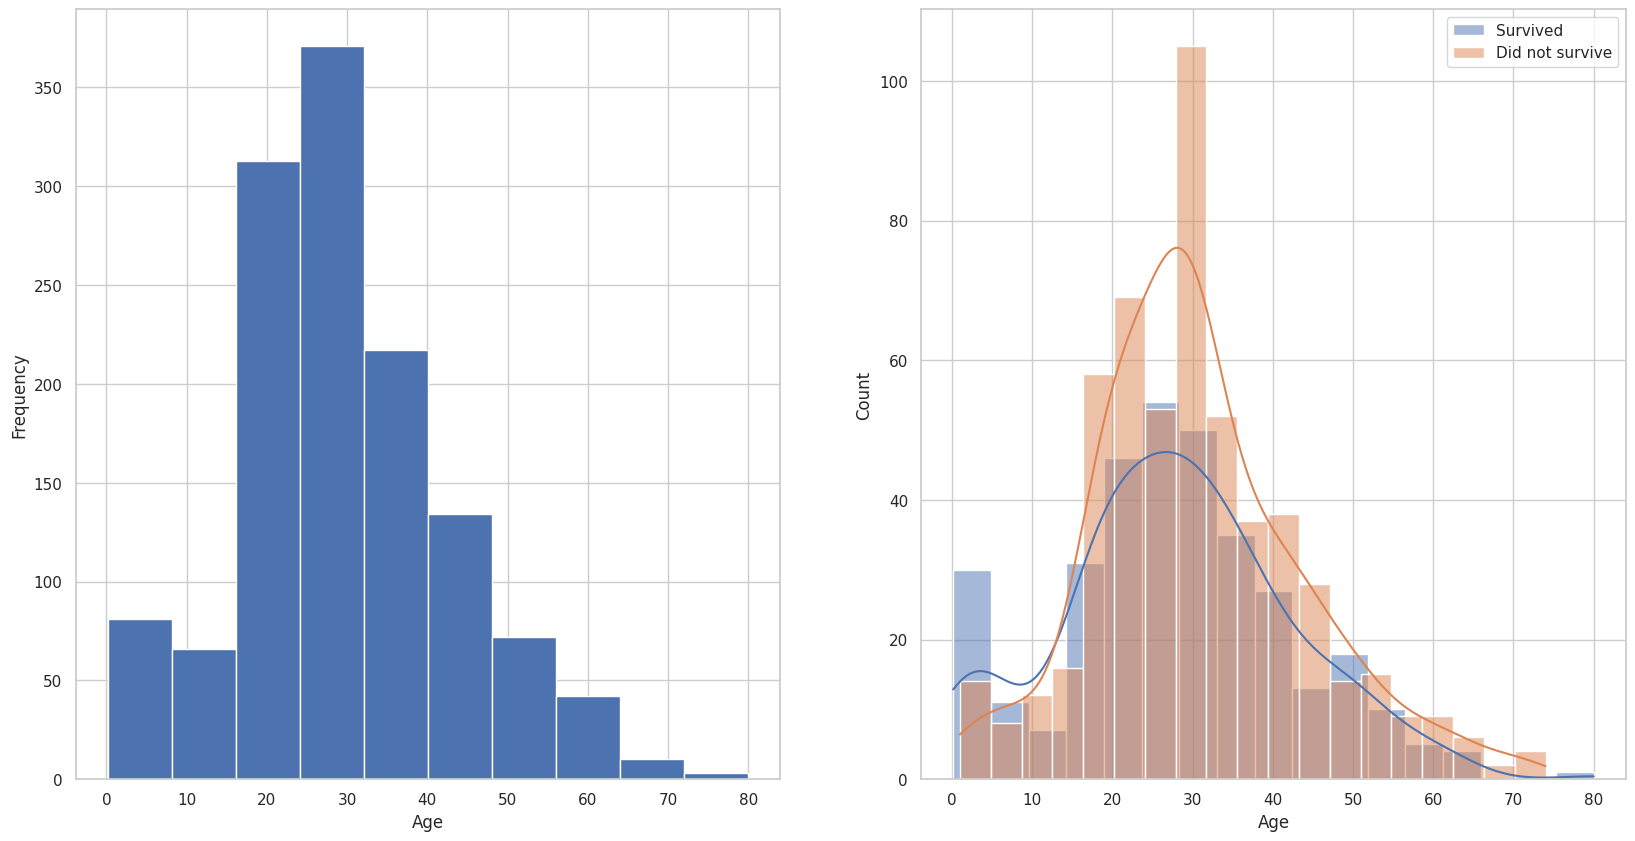

In [52]:
# Merge age predictions
all_data_age = pd.concat([X_train_age, X_test_age], ignore_index=True)
all_data["Age"] = all_data_age["Age"]
plot_hist_dist(df=all_data, 
               label_column="Survived", 
               target_column="Age", 
               figsize=(20, 10), 
               discrete=False, 
               rotate_xaxis_labels=False)

In [53]:
# Scale final data
all_data_scaled = all_data.copy()
all_data_scaled[["Age", "NormFare", "Parch", "SibSp"]] = scale.fit_transform(all_data_scaled[["Age", "NormFare", "Parch", "SibSp"]])
all_data_scaled

,Survived,Age,SibSp,Parch,IsTrain,NormFare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,CabinCount_0,CabinCount_1,CabinCount_2,CabinCount_3,CabinCount_4,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_F E,CabinDeck_F G,CabinDeck_G,CabinDeck_NaN,CabinDeck_T,NameTitle_Capt,NameTitle_Col,NameTitle_Don,NameTitle_Dona,NameTitle_Dr,NameTitle_Jonkheer,NameTitle_Lady,NameTitle_Major,NameTitle_Master,NameTitle_Miss,NameTitle_Mlle,NameTitle_Mme,NameTitle_Mr,NameTitle_Mrs,NameTitle_Ms,NameTitle_Rev,NameTitle_Sir,NameTitle_the Countess,NameSignificance_Civilian,NameSignificance_Military,NameSignificance_Royalty,TicketPrefix_,TicketPrefix_A2,TicketPrefix_A4,TicketPrefix_A5,TicketPrefix_AQ3,TicketPrefix_AQ4,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_CASOTON,TicketPrefix_FA,TicketPrefix_FC,TicketPrefix_FCC,TicketPrefix_LINE,TicketPrefix_LP,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_PPP,TicketPrefix_SC,TicketPrefix_SCA3,TicketPrefix_SCA4,TicketPrefix_SCAH,TicketPrefix_SCAHBASLE,TicketPrefix_SCOW,TicketPrefix_SCPARIS,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOPP,TicketPrefix_SOTONOQ,TicketPrefix_SP,TicketPrefix_STONO2,TicketPrefix_SWPP,TicketPrefix_WC,TicketPrefix_WEP
0,0.0,-0.580007,0.481288,-0.445000,1,-0.897165,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.600810,0.481288,-0.445000,1,1.344579,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,-0.284803,-0.479087,-0.445000,1,-0.815936,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,0.379407,0.481288,-0.445000,1,1.045293,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.379407,-0.479087,-0.445000,1,-0.801570,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.121103,-0.479087,-0.445000,0,-0.801570,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1305,NaN,0.674612,-0.479087,-0.445000,0,1.777333,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1306,NaN,0.637711,-0.479087,-0.445000,0,-0.897165,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1307,NaN,-0.026499,-0.479087,-0.445000,0,-0.801570,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
all_data_scaled.info()  # Quick look at our data types & null counts 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 84 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Survived                   891 non-null    float64
 1   Age                        1309 non-null   float64
 2   SibSp                      1309 non-null   float64
 3   Parch                      1309 non-null   float64
 4   IsTrain                    1309 non-null   int64  
 5   NormFare                   1309 non-null   float64
 6   Embarked_C                 1309 non-null   int64  
 7   Embarked_Q                 1309 non-null   int64  
 8   Embarked_S                 1309 non-null   int64  
 9   Sex_female                 1309 non-null   int64  
 10  Sex_male                   1309 non-null   int64  
 11  Pclass_1                   1309 non-null   int64  
 12  Pclass_2                   1309 non-null   int64  
 13  Pclass_3                   1309 non-null   int64

In [55]:
# Split to train test
X_train = all_data_scaled[all_data_scaled["IsTrain"] == 1]
X_train = X_train.drop(["IsTrain", "Survived"], axis=1)

X_test = all_data_scaled[all_data_scaled["IsTrain"] == 0]
X_test = X_test.drop(["IsTrain", "Survived"], axis=1)

y_train = train_input["Survived"]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Model Building

Now that our data has been manipulated and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

Let's start by splitting our training data into a training set and a validation set.

In [56]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25)
for train_indices, test_indices in split.split(train_input, train_input[["Survived", "Pclass", "Sex"]]):
    stratified_X_train = X_train.loc[train_indices]
    stratified_y_train = train_input.loc[train_indices]["Survived"]
    stratified_X_test = X_train.loc[test_indices]
    stratified_y_test = train_input.loc[test_indices]["Survived"]

In [57]:
stratified_X_train

,Age,SibSp,Parch,NormFare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,CabinCount_0,CabinCount_1,CabinCount_2,CabinCount_3,CabinCount_4,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_F E,CabinDeck_F G,CabinDeck_G,CabinDeck_NaN,CabinDeck_T,NameTitle_Capt,NameTitle_Col,NameTitle_Don,NameTitle_Dona,NameTitle_Dr,NameTitle_Jonkheer,NameTitle_Lady,NameTitle_Major,NameTitle_Master,NameTitle_Miss,NameTitle_Mlle,NameTitle_Mme,NameTitle_Mr,NameTitle_Mrs,NameTitle_Ms,NameTitle_Rev,NameTitle_Sir,NameTitle_the Countess,NameSignificance_Civilian,NameSignificance_Military,NameSignificance_Royalty,TicketPrefix_,TicketPrefix_A2,TicketPrefix_A4,TicketPrefix_A5,TicketPrefix_AQ3,TicketPrefix_AQ4,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_CASOTON,TicketPrefix_FA,TicketPrefix_FC,TicketPrefix_FCC,TicketPrefix_LINE,TicketPrefix_LP,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_PPP,TicketPrefix_SC,TicketPrefix_SCA3,TicketPrefix_SCA4,TicketPrefix_SCAH,TicketPrefix_SCAHBASLE,TicketPrefix_SCOW,TicketPrefix_SCPARIS,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOPP,TicketPrefix_SOTONOQ,TicketPrefix_SP,TicketPrefix_STONO2,TicketPrefix_SWPP,TicketPrefix_WC,TicketPrefix_WEP
648,-0.469306,-0.479087,-0.445000,-0.860272,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
129,1.117418,-0.479087,-0.445000,-0.932181,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
252,2.372037,-0.479087,-0.445000,0.348272,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
273,0.527009,-0.479087,0.710763,0.460092,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
654,-0.875212,-0.479087,-0.445000,-0.961741,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-2.056030,0.481288,1.866526,2.116037,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272,0.822214,-0.479087,0.710763,0.042976,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
550,-0.949013,-0.479087,1.866526,1.795807,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
823,-0.211002,-0.479087,0.710763,-0.390410,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
stratified_X_train.info()  # Quick look at our data types & null counts 

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 648 to 669
Data columns (total 82 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        668 non-null    float64
 1   SibSp                      668 non-null    float64
 2   Parch                      668 non-null    float64
 3   NormFare                   668 non-null    float64
 4   Embarked_C                 668 non-null    int64  
 5   Embarked_Q                 668 non-null    int64  
 6   Embarked_S                 668 non-null    int64  
 7   Sex_female                 668 non-null    int64  
 8   Sex_male                   668 non-null    int64  
 9   Pclass_1                   668 non-null    int64  
 10  Pclass_2                   668 non-null    int64  
 11  Pclass_3                   668 non-null    int64  
 12  CabinCount_0               668 non-null    int64  
 13  CabinCount_1               668 non-null    int64  
 1

### Model Building: Baseline Validation

Before going further, let's how various different models perform with default parameters and 10-fold cross validation to get a baseline. With a validation set baseline, we can see how much tuning improves each of the models. Just because a model has a high baseline doesn't mean that it will actually do better on the eventual test set.

#### Gaussian Naive Bayes

In [59]:
# Gaussian Naive Bayes
start_time = time.time()
gaussian = GaussianNB()
gaussian_cv = cross_val_score(gaussian, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
gaussian_cv_accuracy = round(gaussian_cv.mean() * 100, 2)  # Cross-validation accuracy metric
gaussian_time = time.time() - start_time
print("Accuracy CV 10-Fold: " + str(gaussian_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=gaussian_time)))

Accuracy CV 10-Fold: 71.72
Running Time: 0:00:00.074211


#### Logistic Regression

In [60]:
# Logistic Regression
start_time = time.time()
logreg = LogisticRegression(max_iter=2000)
logreg_cv = cross_val_score(logreg, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
logreg_cv_accuracy = round(logreg_cv.mean() * 100, 2)  # Cross-validation accuracy metric
logreg_time = time.time() - start_time
print("Accuracy CV 10-Fold: " + str(logreg_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=logreg_time)))

Accuracy CV 10-Fold: 82.04
Running Time: 0:00:00.254533


#### Decision Tree Classifier

In [61]:
# Decision Tree Classifier
start_time = time.time()
dt = DecisionTreeClassifier()
dt_cv = cross_val_score(dt, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
dt_cv_accuracy = round(dt_cv.mean() * 100, 2)  # Cross-validation accuracy metric
dt_time = time.time() - start_time
print("Accuracy CV 10-Fold: " + str(dt_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=dt_time)))

Accuracy CV 10-Fold: 82.33
Running Time: 0:00:00.093232


#### k-Nearest Neighbors

In [62]:
# k-Nearest Neighbors
start_time = time.time()
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
knn_cv_accuracy = round(knn_cv.mean() * 100, 2)  # Cross-validation accuracy metric
knn_time = time.time() - start_time
print("Accuracy CV 10-Fold: " + str(knn_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=knn_time)))

Accuracy CV 10-Fold: 82.64
Running Time: 0:00:00.188857


#### Random Forest

In [63]:
# Random Forest
start_time = time.time()
rf = RandomForestClassifier()
rf_cv = cross_val_score(rf, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
rf_cv_accuracy = round(rf_cv.mean() * 100, 2)  # Cross-validation accuracy metric
rf_time = time.time() - start_time
print("Accuracy CV 10-Fold: " + str(rf_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=rf_time)))

Accuracy CV 10-Fold: 82.19
Running Time: 0:00:02.036990


#### Linear SVC

In [64]:
# Linear SVC
start_time = time.time()
linear_svc = LinearSVC()
linear_svc_cv = cross_val_score(linear_svc, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
linear_svc_cv_accuracy = round(linear_svc_cv.mean() * 100, 2)  # Cross-validation accuracy metric
linear_svc_time = time.time() - start_time
print("Accuracy CV 10-Fold: " + str(linear_svc_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=linear_svc_time)))

calibrated_linear_svc = CalibratedClassifierCV(linear_svc, cv=10)  # Needed for the Voting Classifier

Accuracy CV 10-Fold: 81.74
Running Time: 0:00:00.322528


#### SVC

In [65]:
# SVC
start_time = time.time()
svc = SVC(probability=True)
svc_cv = cross_val_score(svc, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
svc_cv_accuracy = round(svc_cv.mean() * 100, 2)  # Cross-validation accuracy metric
svc_time = time.time() - start_time
print("Accuracy CV 10-Fold: " + str(svc_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=svc_time)))

Accuracy CV 10-Fold: 82.94
Running Time: 0:00:00.910795


#### Stochasatic Gradient Descent

In [66]:
# Stochastic Gradient Descent
start_time = time.time()
sgd = SGDClassifier(loss="log_loss")  # log_loss is required for the Voting Classifier
sgd_cv = cross_val_score(sgd, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
sgd_cv_accuracy = round(sgd_cv.mean() * 100, 2)  # Cross-validation accuracy metric
sgd_time = time.time() - start_time
print("Accuracy CV 10-Fold: " + str(sgd_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=sgd_time)))

Accuracy CV 10-Fold: 78.14
Running Time: 0:00:00.196200


#### Gradient Boosting Trees

In [67]:
# Gradient Boosting Trees
start_time = time.time()
gbt = GradientBoostingClassifier()
gbt_cv = cross_val_score(gbt, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
gbt_cv_accuracy = round(gbt_cv.mean() * 100, 2)  # Cross-validation accuracy metric
gbt_time = time.time() - start_time
print("Accuracy CV 10-Fold: " + str(gbt_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=gbt_time)))

Accuracy CV 10-Fold: 82.04
Running Time: 0:00:01.681180


#### Xtreme Gradient Boosting

In [68]:
# Xtreme Gradient Boosting	
start_time = time.time()
xgb = XGBClassifier()
xgb_cv = cross_val_score(xgb, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
xgb_cv_accuracy = round(xgb_cv.mean() * 100, 2)  # Cross-validation accuracy metric
xgb_time = time.time() - start_time
print("Accuracy CV 10-Fold: " + str(xgb_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=xgb_time)))

Accuracy CV 10-Fold: 82.94
Running Time: 0:00:01.331396


#### CatBoost Algorithm

In [69]:
# Define the categorical features for the CatBoost model
categorical_features = np.where(stratified_X_train.dtypes != float)[0]
categorical_features

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

This means Catboost has picked up that all variables except Age, SibSp, Parch, and NormFare can be treated as categorical.

In [70]:
train_pool = Pool(stratified_X_train, stratified_y_train, categorical_features)

In [71]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000, custom_loss=["Accuracy"], loss_function="Logloss")

# Fit CatBoost model
catboost_model.fit(train_pool, verbose=100)

Learning rate set to 0.008672
0:	learn: 0.6876754	total: 2.42ms	remaining: 2.42s
100:	learn: 0.4365418	total: 182ms	remaining: 1.62s
200:	learn: 0.3765628	total: 360ms	remaining: 1.43s
300:	learn: 0.3503822	total: 548ms	remaining: 1.27s
400:	learn: 0.3310738	total: 733ms	remaining: 1.09s
500:	learn: 0.3150969	total: 912ms	remaining: 909ms
600:	learn: 0.3017464	total: 1.09s	remaining: 724ms
700:	learn: 0.2882533	total: 1.27s	remaining: 544ms
800:	learn: 0.2746164	total: 1.46s	remaining: 364ms
900:	learn: 0.2597797	total: 1.65s	remaining: 181ms
999:	learn: 0.2460463	total: 1.84s	remaining: 0us


##### Perform CatBoost cross-validation

In [72]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool, cv_params, fold_count=10, verbose=1000)

# How long did it take?
catboost_time = time.time() - start_time

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
catboost_cv_accuracy = round(np.max(cv_data["test-Accuracy-mean"]) * 100, 2)  # Cross-validation accuracy metric

Training on fold [0/10]
0:	learn: 0.6748847	test: 0.6759258	best: 0.6759258 (0)	total: 2.54ms	remaining: 2.54s
999:	learn: 0.0899164	test: 0.3764131	best: 0.3479116 (223)	total: 1.87s	remaining: 0us

bestTest = 0.3479115519
bestIteration = 223

Training on fold [1/10]
0:	learn: 0.6780717	test: 0.6793444	best: 0.6793444 (0)	total: 1.15ms	remaining: 1.15s
999:	learn: 0.0934126	test: 0.3376508	best: 0.3331364 (835)	total: 1.88s	remaining: 0us

bestTest = 0.3331363815
bestIteration = 835

Training on fold [2/10]
0:	learn: 0.6743828	test: 0.6783628	best: 0.6783628 (0)	total: 2.21ms	remaining: 2.21s
999:	learn: 0.0722520	test: 0.6991672	best: 0.5054765 (45)	total: 1.9s	remaining: 0us

bestTest = 0.505476514
bestIteration = 45

Training on fold [3/10]
0:	learn: 0.6758855	test: 0.6764984	best: 0.6764984 (0)	total: 2.19ms	remaining: 2.19s
999:	learn: 0.0874515	test: 0.4184720	best: 0.3922935 (469)	total: 1.93s	remaining: 0us

bestTest = 0.3922934972
bestIteration = 469

Training on fold [4/10]


In [73]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy cross-validation 10-Fold: " + str(catboost_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy cross-validation 10-Fold: 84.59
Running Time: 0:00:20.464406


#### Soft Voting Classifier

In [74]:
# Soft Voting Classifier
start_time = time.time()
voting_clf = VotingClassifier(estimators = [("gaussian", gaussian), ("logreg", logreg), ("dt", dt), ("knn", knn), ("rf", rf), 
                                            ("calibrated_linear_svc", calibrated_linear_svc), ("svc", svc), ("sgd", sgd), ("gbt", gbt), ("xgb", xgb),
                                            ("catboost_model", CatBoostClassifier(iterations=1000, loss_function="Logloss", verbose=1000))], 
                              voting = "soft")

voting_clf_cv = cross_val_score(voting_clf, stratified_X_train, stratified_y_train, cv=10)  # Cross Validation 
voting_clf_cv_accuracy = round(voting_clf_cv.mean() * 100, 2)  # Cross-validation accuracy metric
voting_clf_time = time.time() - start_time
print()
print("Accuracy CV 10-Fold: " + str(voting_clf_cv_accuracy))
print("Running Time: " + str(datetime.timedelta(seconds=voting_clf_time)))

Learning rate set to 0.008289
0:	learn: 0.6870292	total: 2.02ms	remaining: 2.02s
999:	learn: 0.2479751	total: 1.71s	remaining: 0us
Learning rate set to 0.008289
0:	learn: 0.6880743	total: 1.66ms	remaining: 1.65s
999:	learn: 0.2441535	total: 1.73s	remaining: 0us
Learning rate set to 0.008289
0:	learn: 0.6887733	total: 1.65ms	remaining: 1.65s
999:	learn: 0.2346206	total: 1.77s	remaining: 0us
Learning rate set to 0.008289
0:	learn: 0.6881883	total: 1.77ms	remaining: 1.77s
999:	learn: 0.2555139	total: 1.72s	remaining: 0us
Learning rate set to 0.008289
0:	learn: 0.6882600	total: 1.95ms	remaining: 1.95s
999:	learn: 0.2490001	total: 1.71s	remaining: 0us
Learning rate set to 0.008289
0:	learn: 0.6880684	total: 2.57ms	remaining: 2.57s
999:	learn: 0.2431546	total: 1.73s	remaining: 0us
Learning rate set to 0.008289
0:	learn: 0.6879478	total: 1.94ms	remaining: 1.94s
999:	learn: 0.2463752	total: 1.74s	remaining: 0us
Learning rate set to 0.008289
0:	learn: 0.6885032	total: 1.65ms	remaining: 1.65s
99

#### Model Results: Baseline Cross-Validation Performance

Which model had the best cross-validation accuracy score?

In [75]:
models = pd.DataFrame({
        "Model": ["Naive Bayes", "Logistic Regression", "Decision Tree", "KNN", "Random Forest", "Linear SVC", "SVC", "Stochastic Gradient Descent", "Gradient Boosting Trees", "Xtreme Gradient Boosting", "CatBoost", "Soft Voting Classifier"],
        "Baseline Score": [gaussian_cv_accuracy, logreg_cv_accuracy, dt_cv_accuracy, knn_cv_accuracy, rf_cv_accuracy, linear_svc_cv_accuracy, svc_cv_accuracy, sgd_cv_accuracy, gbt_cv_accuracy, xgb_cv_accuracy, catboost_cv_accuracy, voting_clf_cv_accuracy]
})

models.sort_values(by="Baseline Score", ascending=False)

,Model,Baseline Score
10,CatBoost,84.59
11,Soft Voting Classifier,84.43
6,SVC,82.94
9,Xtreme Gradient Boosting,82.94
3,KNN,82.64
2,Decision Tree,82.33
4,Random Forest,82.19
1,Logistic Regression,82.04
8,Gradient Boosting Trees,82.04
5,Linear SVC,81.74


### Model Building: Tuned Performance

After getting the baselines, let's see if we can tune the models to improve their results using GridSearch (and RandomizedSearch for the Random Forest and XG Boosted Model to simplify testing time).

In [76]:
# Simple performance reporting function
def clf_performance(classifier: BaseEstimator) -> tuple:
    best_train_score = round(classifier.best_score_ * 100, 2)
    best_test_score = round(classifier.best_estimator_.score(X=stratified_X_test, y=stratified_y_test) * 100, 2)
    print("Best Parameters:"  + str(classifier.best_params_))
    print("Best Train Score: " + str(best_train_score))
    print("Best Test Score: " + str(best_test_score))
    return (best_train_score, best_test_score)

#### Logistic Regression

In [77]:
# Logistic Regression
start_time = time.time()
logreg = LogisticRegression(max_iter=2000)
param_grid = {"max_iter": [2000], 
              "penalty": ["l1", "l2"], 
              "C": np.logspace(-4, 4, 20), 
              "solver": ["liblinear"]}

clf_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs=-1, return_train_score=True)
best_clf_logreg = clf_logreg.fit(stratified_X_train, stratified_y_train)
logreg_accuracy_tuple = clf_performance(classifier=best_clf_logreg)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best Parameters:{'C': 11.288378916846883, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Train Score: 82.78
Best Test Score: 82.06


#### k-Nearest Neighbors

In [78]:
# k-Nearest Neighbors
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": [3, 5, 7, 9], 
              "weights": ["uniform", "distance"], 
              "algorithm": ["auto", "ball_tree", "kd_tree"], 
              "p": [1, 2]}

clf_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs=-1, return_train_score=True)
best_clf_knn = clf_knn.fit(stratified_X_train, stratified_y_train)
knn_accuracy_tuple = clf_performance(classifier=best_clf_knn)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best Parameters:{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best Train Score: 82.64
Best Test Score: 81.61


#### Random Forest

In [79]:
# Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model before doing a more granular search 
rf = RandomForestClassifier()
param_grid = {"n_estimators": [10, 20, 50, 100, 200, 250, 500, 1000], 
              "bootstrap": [True, False], 
              "max_depth": [None, 3, 5, 10, 20, 50, 75, 100], 
              "max_features": ["auto", "sqrt"], 
              "min_samples_leaf": [1, 2, 4, 10], 
              "min_samples_split": [2, 3, 4, 5, 10]}

clf_rf_rnd = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=10, scoring="accuracy", verbose=True, n_jobs=-1, return_train_score=True)
best_clf_rf_rnd = clf_rf_rnd.fit(stratified_X_train, stratified_y_train)
_ = clf_performance(classifier=best_clf_rf_rnd)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters:{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
Best Train Score: 83.68
Best Test Score: 82.96


In [80]:
# Random Forest
rf = RandomForestClassifier()
param_grid = {"n_estimators": [400, 450, 500, 550], 
              "criterion": ["gini", "entropy"], 
              "bootstrap": [True], 
              "max_depth": [15, 20, 25], 
              "max_features": ["auto", "sqrt", 10], 
              "min_samples_leaf": [2, 3], 
              "min_samples_split": [2, 3]}

clf_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs=-1, return_train_score=True)
best_clf_rf = clf_rf.fit(stratified_X_train, stratified_y_train)
rf_accuracy_tuple = clf_performance(classifier=best_clf_rf)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best Parameters:{'bootstrap': True, 'criterion': 'gini', 'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 450}
Best Train Score: 84.13
Best Test Score: 82.06


#### SVC

In [81]:
# SVC
svc = SVC(probability=True)
param_grid = [{"kernel": ["rbf"], "gamma": [0.1, 0.5, 1, 2, 5, 10], "C": [0.1, 1, 10, 100, 1000]}, 
              {"kernel": ["linear"], "C": [0.1, 1, 10, 100, 1000]}, 
              {"kernel": ["poly"], "degree": [2, 3, 4, 5], "C": [0.1, 1, 10, 100, 1000]}]

clf_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs=-1, return_train_score=True)
best_clf_svc = clf_svc.fit(stratified_X_train, stratified_y_train)
svc_accuracy_tuple = clf_performance(classifier=best_clf_svc)

Fitting 10 folds for each of 55 candidates, totalling 550 fits
Best Parameters:{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Train Score: 83.24
Best Test Score: 78.92


#### Xtreme Gradient Boosting

In [82]:
# Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model before doing a more granular search 
xgb = XGBClassifier()

param_grid = {"n_estimators": [10, 20, 50, 100, 200, 250, 500, 1000], 
              "colsample_bytree": [0.2, 0.5, 0.7, 0.8, 1], 
              "max_depth": [2, 5, 10, 15, 20, 25, None], 
              "reg_alpha": [0, 0.5, 1], 
              "reg_lambda": [1, 1.5, 2], 
              "subsample": [0.5, 0.6, 0.7, 0.8, 0.9], 
              "learning_rate": [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9], 
              "gamma": [0, 0.01, 0.1, 1, 10, 100], 
              "min_child_weight": [0, 0.01, 0.1, 1, 10, 100], 
              "sampling_method": ["uniform", "gradient_based"]}

clf_xgb_rnd = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=1000, cv=10, scoring="accuracy", verbose=True, n_jobs=-1, return_train_score=True)
best_clf_xgb_rnd = clf_xgb_rnd.fit(stratified_X_train, stratified_y_train)
_ = clf_performance(classifier=best_clf_xgb_rnd)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
Best Parameters:{'subsample': 0.7, 'sampling_method': 'uniform', 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 50, 'min_child_weight': 0.1, 'max_depth': 10, 'learning_rate': 0.5, 'gamma': 0.01, 'colsample_bytree': 0.2}
Best Train Score: 85.03
Best Test Score: 82.06


In [83]:
# Xtreme Gradient Boosting	
xgb = XGBClassifier()
param_grid = {"n_estimators": [450, 500, 550], 
              "colsample_bytree": [0.75, 0.8, 0.85], 
              "max_depth": [None], 
              "reg_alpha": [1], 
              "reg_lambda": [2, 5, 10], 
              "subsample": [0.55, 0.6, .65], 
              "learning_rate": [0.5], 
              "gamma": [.5, 1, 2], 
              "min_child_weight": [0.01], 
              "sampling_method": ["uniform"]}

clf_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs=-1, return_train_score=True)
best_clf_xgb = clf_xgb.fit(stratified_X_train, stratified_y_train)
xgb_accuracy_tuple = clf_performance(classifier=best_clf_xgb)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best Parameters:{'colsample_bytree': 0.75, 'gamma': 2, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.6}
Best Train Score: 84.88
Best Test Score: 80.27


In [84]:
models = pd.DataFrame({
        "Model": ["Naive Bayes", "Logistic Regression", "Decision Tree", "KNN", "Random Forest", "Linear SVC", "SVC", "Stochastic Gradient Descent", "Gradient Boosting Trees", "Xtreme Gradient Boosting", "CatBoost", "Soft Voting Classifier"],
        "Baseline Score": [gaussian_cv_accuracy, logreg_cv_accuracy, dt_cv_accuracy, knn_cv_accuracy, rf_cv_accuracy, linear_svc_cv_accuracy, svc_cv_accuracy, sgd_cv_accuracy, gbt_cv_accuracy, xgb_cv_accuracy, catboost_cv_accuracy, voting_clf_cv_accuracy], 
        "Tuned Train Score": [np.NaN, logreg_accuracy_tuple[0], np.NaN, knn_accuracy_tuple[0], rf_accuracy_tuple[0], np.NaN, svc_accuracy_tuple[0], np.NaN, np.NaN, xgb_accuracy_tuple[0], np.NaN, np.NaN], 
        "Tuned Test Score": [np.NaN, logreg_accuracy_tuple[1], np.NaN, knn_accuracy_tuple[1], rf_accuracy_tuple[1], np.NaN, svc_accuracy_tuple[1], np.NaN, np.NaN, xgb_accuracy_tuple[1], np.NaN, np.NaN]
})

models.sort_values(by=["Tuned Test Score", "Tuned Train Score", "Baseline Score"], ascending=[False, False, False])

,Model,Baseline Score,Tuned Train Score,Tuned Test Score
4,Random Forest,82.19,84.13,82.06
1,Logistic Regression,82.04,82.78,82.06
3,KNN,82.64,82.64,81.61
9,Xtreme Gradient Boosting,82.94,84.88,80.27
6,SVC,82.94,83.24,78.92
10,CatBoost,84.59,NaN,NaN
11,Soft Voting Classifier,84.43,NaN,NaN
2,Decision Tree,82.33,NaN,NaN
8,Gradient Boosting Trees,82.04,NaN,NaN
5,Linear SVC,81.74,NaN,NaN


### Model Building: Additional Ensemble Approaches

In [85]:
best_logreg = best_clf_logreg.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators=[("knn", best_knn), ("rf", best_rf), ("svc", best_svc)], voting="hard") 
voting_clf_soft = VotingClassifier(estimators=[("knn", best_knn), ("rf", best_rf), ("svc", best_svc)], voting="soft") 
voting_clf_all = VotingClassifier(estimators=[("knn", best_knn), ("rf", best_rf), ("svc", best_svc), ("logreg", best_logreg)], voting="soft") 
voting_clf_xgb = VotingClassifier(estimators=[("knn", best_knn), ("rf", best_rf), ("svc", best_svc), ("logreg", best_logreg), ("xgb", best_xgb)], voting="soft")

voting_clf_hard.fit(stratified_X_train, stratified_y_train)
print("Hard voting clf of three tuned estimators (KNN, RF, SVC)")
print("Best Train Score: " + str(round(voting_clf_hard.score(X=stratified_X_train, y=stratified_y_train) * 100, 2)))
print("Best Test Score: " + str(round(voting_clf_hard.score(X=stratified_X_test, y=stratified_y_test) * 100, 2)))
print()

voting_clf_soft.fit(stratified_X_train, stratified_y_train)
print("Soft voting clf of three tuned estimators (KNN, RF, SVC)")
print("Best Train Score: " + str(round(voting_clf_soft.score(X=stratified_X_train, y=stratified_y_train) * 100, 2)))
print("Best Test Score: " + str(round(voting_clf_soft.score(X=stratified_X_test, y=stratified_y_test) * 100, 2)))
print()

voting_clf_all.fit(stratified_X_train, stratified_y_train)
print("Soft voting clf of all tuned estimators except xgb (KNN, RF, SVC, LOGREG)")
print("Best Train Score: " + str(round(voting_clf_all.score(X=stratified_X_train, y=stratified_y_train) * 100, 2)))
print("Best Test Score: " + str(round(voting_clf_all.score(X=stratified_X_test, y=stratified_y_test) * 100, 2)))
print()

voting_clf_xgb.fit(stratified_X_train, stratified_y_train)
print("Soft voting clf of all tuned estimators including xgb (KNN, RF, SVC, LOGREG, XGB)")
print("Best Train Score: " + str(round(voting_clf_xgb.score(X=stratified_X_train, y=stratified_y_train) * 100, 2)))
print("Best Test Score: " + str(round(voting_clf_xgb.score(X=stratified_X_test, y=stratified_y_test) * 100, 2)))

Hard voting clf of three tuned estimators (KNN, RF, SVC)
Best Train Score: 89.97
Best Test Score: 81.61

Soft voting clf of three tuned estimators (KNN, RF, SVC)
Best Train Score: 90.42
Best Test Score: 80.27

Soft voting clf of all tuned estimators except xgb (KNN, RF, SVC, LOGREG)
Best Train Score: 90.12
Best Test Score: 80.27

Soft voting clf of all tuned estimators including xgb (KNN, RF, SVC, LOGREG, XGB)
Best Train Score: 90.12
Best Test Score: 82.06


In [86]:
# Use GridSearch to explore different weightings for the models in the soft voting classifiers above.
print("Weighted voting clf of three tuned estimators (KNN, RF, SVC)")
param_grid = {"weights": [[1, 1, 1], [1, 1, 2], [1 ,2, 1], [1, 2, 2], [2, 1, 1], [2, 1, 2], [2, 2, 1]]}
vote_weight = GridSearchCV(estimator=voting_clf_soft, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs = -1, return_train_score=True)
best_clf_weight = vote_weight.fit(stratified_X_train, stratified_y_train)
_ = clf_performance(classifier=best_clf_weight)
print()

print("Weighted voting clf of all tuned estimators except xgb (KNN, RF, SVC, LOGREG)")
param_grid = {"weights": [[1, 1, 1, 1], [1, 1, 1, 2], [1, 1, 2, 1], [1, 1, 2, 2], [1, 2, 1, 1], [1, 2, 1, 2], [1, 2, 2, 1], [1, 2, 2, 2], [2, 1, 1, 1], [2, 1, 1, 2], [2, 1, 2, 1], [2, 1, 2, 2], [2, 2, 1, 1], [2, 2, 1, 2], [2, 2, 2, 1]]}
vote_weight = GridSearchCV(estimator=voting_clf_all, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs = -1, return_train_score=True)
best_clf_weight = vote_weight.fit(stratified_X_train, stratified_y_train)
_ = clf_performance(classifier=best_clf_weight)
print()

print("Weighted voting clf of all tuned estimators including xgb (KNN, RF, SVC, LOGREG, XGB)")
param_grid = {"weights": [[1, 1, 1, 1, 1], [1, 1, 1, 1, 2], [1, 1, 1, 2, 1], [1, 1, 1, 2, 2], [1, 1, 2, 1, 1], [1, 1, 2, 1, 2], [1, 1, 2, 2, 1], [1, 1, 2, 2, 2], [1, 2, 1, 1, 1], [1, 2, 1, 1, 2], [1, 2, 1, 2, 1], [1, 2, 1, 2, 2], [1, 2, 2, 1, 1], [1, 2, 2, 1, 2], [1, 2, 2, 2, 1], [1, 2, 2, 2, 2], 
                          [2, 1, 1, 1, 1], [2, 1, 1, 1, 2], [2, 1, 1, 2, 1], [2, 1, 1, 2, 2], [2, 1, 2, 1, 1], [2, 1, 2, 1, 2], [2, 1, 2, 2, 1], [2, 1, 2, 2, 2], [2, 2, 1, 1, 1], [2, 2, 1, 1, 2], [2, 2, 1, 2, 1], [2, 2, 1, 2, 2], [2, 2, 2, 1, 1], [2, 2, 2, 1, 2], [2, 2, 2, 2, 1]]}
vote_weight = GridSearchCV(estimator=voting_clf_xgb, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs = -1, return_train_score=True)
best_clf_weight = vote_weight.fit(stratified_X_train, stratified_y_train)
_ = clf_performance(classifier=best_clf_weight)

Weighted voting clf of three tuned estimators (KNN, RF, SVC)
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Parameters:{'weights': [1, 2, 2]}
Best Train Score: 83.38
Best Test Score: 81.61

Weighted voting clf of all tuned estimators except xgb (KNN, RF, SVC, LOGREG)
Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best Parameters:{'weights': [1, 1, 2, 1]}
Best Train Score: 83.38
Best Test Score: 81.17

Weighted voting clf of all tuned estimators including xgb (KNN, RF, SVC, LOGREG, XGB)
Fitting 10 folds for each of 31 candidates, totalling 310 fits
Best Parameters:{'weights': [1, 1, 2, 2, 2]}
Best Train Score: 83.69
Best Test Score: 82.06


### Model Building: Full Training

After examining all the tuned models, we will be proceeding with a voting classifier of only two estimators: Random Forest and SVC.

#### Random Forest

In [87]:
# Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model before doing a more granular search 
rf = RandomForestClassifier()
param_grid = {"n_estimators": [10, 20, 50, 100, 200, 250, 500, 1000], 
              "bootstrap": [True, False], 
              "max_depth": [None, 3, 5, 10, 20, 50, 75, 100], 
              "max_features": ["auto", "sqrt"], 
              "min_samples_leaf": [1, 2, 4, 10], 
              "min_samples_split": [2, 3, 4, 5, 10]}

clf_rf_rnd = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=10, scoring="accuracy", verbose=True, n_jobs=-1, return_train_score=True)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train, y_train)
print("Best Parameters:"  + str(best_clf_rf_rnd.best_params_))
print("Best Train Score: " + str(round(best_clf_rf_rnd.best_score_ * 100, 2)))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters:{'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}
Best Train Score: 83.95


In [88]:
# Random Forest
rf = RandomForestClassifier()
param_grid = {"n_estimators": [400, 450, 500, 550], 
              "criterion": ["gini", "entropy"], 
              "bootstrap": [True], 
              "max_depth": [15, 20, 25], 
              "max_features": ["auto", "sqrt", 10], 
              "min_samples_leaf": [2, 3], 
              "min_samples_split": [2, 3]}

clf_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs=-1, return_train_score=True)
best_clf_rf = clf_rf.fit(X_train, y_train)
print("Best Parameters:"  + str(best_clf_rf.best_params_))
print("Best Train Score: " + str(round(best_clf_rf.best_score_ * 100, 2)))

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best Parameters:{'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 550}
Best Train Score: 83.84


#### SVC

In [89]:
# SVC
svc = SVC(probability=True)
param_grid = [{"kernel": ["rbf"], "gamma": [0.1, 0.5, 1, 2, 5, 10], "C": [0.1, 1, 10, 100, 1000]}, 
              {"kernel": ["linear"], "C": [0.1, 1, 10, 100, 1000]}, 
              {"kernel": ["poly"], "degree": [2, 3, 4, 5], "C": [0.1, 1, 10, 100, 1000]}]

clf_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs=-1, return_train_score=True)
best_clf_svc = clf_svc.fit(X_train, y_train)
print("Best Parameters:"  + str(best_clf_svc.best_params_))
print("Best Train Score: " + str(round(best_clf_svc.best_score_ * 100, 2)))

Fitting 10 folds for each of 55 candidates, totalling 550 fits
Best Parameters:{'C': 1, 'degree': 3, 'kernel': 'poly'}
Best Train Score: 83.39


#### Voting Classifiers

In [90]:
best_rf = best_clf_rf.best_estimator_
best_svc = best_clf_svc.best_estimator_

prod_final_clf_hard = VotingClassifier(estimators=[("rf", best_rf), ("svc", best_svc)], voting="hard") 
prod_final_clf_soft = VotingClassifier(estimators=[("rf", best_rf), ("svc", best_svc)], voting="soft") 

prod_final_clf_hard.fit(X_train, y_train)
hard_cv = cross_val_score(prod_final_clf_hard, X_train, y_train, cv=10)  # Cross Validation 
hard_cv_accuracy = round(hard_cv.mean() * 100, 2)  # Cross-validation accuracy metric
print("voting_clf_hard")
print("Accuracy CV 10-Fold: " + str(hard_cv_accuracy))
print()


prod_final_clf_soft.fit(X_train, y_train)
soft_cv = cross_val_score(prod_final_clf_soft, X_train, y_train, cv=10)  # Cross Validation 
soft_cv_accuracy = round(soft_cv.mean() * 100, 2)  # Cross-validation accuracy metric
print("voting_clf_soft")
print("Accuracy CV 10-Fold: " + str(soft_cv_accuracy))

voting_clf_hard
Accuracy CV 10-Fold: 83.28

voting_clf_soft
Accuracy CV 10-Fold: 83.5


In [91]:
# Use GridSearch to explore different weightings
# Alternative model weighting did not improve performance in practice for the Titanic
print("voting_clf_weight")
param_grid = {"weights": [[1, 1], [1, 2], [2, 1]]}
vote_weight = GridSearchCV(estimator=prod_final_clf_soft, param_grid=param_grid, cv=10, scoring="accuracy", verbose=True, n_jobs = -1, return_train_score=True)
best_clf_weight = vote_weight.fit(X_train, y_train)
prod_final_clf_weight = best_clf_weight.best_estimator_
print("Best Parameters:"  + str(best_clf_weight.best_params_))
print("Best Train Score: " + str(round(best_clf_weight.best_score_ * 100, 2)))

voting_clf_weight
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Parameters:{'weights': [1, 1]}
Best Train Score: 83.5


### Model Building: Final Selection

In practice, the hard voting classifier of Random Forest and SVC performed best, beating out the soft voting classifier and the weighted voting classifier.

In [92]:
prod_final_clf_hard

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     max_features='auto',
                                                     min_samples_leaf=2,
                                                     min_samples_split=3,
                                                     n_estimators=550)),
                             ('svc',
                              SVC(C=1, kernel='poly', probability=True))])

## Evaluation

### Feature Importance

Age                 0.042200
NormFare            0.024878
Pclass_3            0.017471
NameTitle_Mr        0.013206
SibSp               0.011298
CabinCount_0        0.010400
CabinDeck_NaN       0.010101
CabinCount_1        0.009166
Pclass_2            0.007632
Embarked_C          0.007445
Parch               0.006996
Pclass_1            0.006659
NameTitle_Master    0.005200
TicketPrefix_PC     0.004863
Embarked_S          0.003966
Sex_female          0.003816
CabinDeck_E         0.003629
Embarked_Q          0.003143
NameTitle_Mrs       0.002694
Sex_male            0.002581
CabinDeck_D         0.002581
CabinCount_2        0.002357
CabinDeck_B         0.002170
NameTitle_Miss      0.001646
CabinDeck_A         0.001235
TicketPrefix_A5     0.001122
TicketPrefix_       0.000823
CabinDeck_C         0.000711
TicketPrefix_CA     0.000150
CabinDeck_F         0.000037
dtype: float64


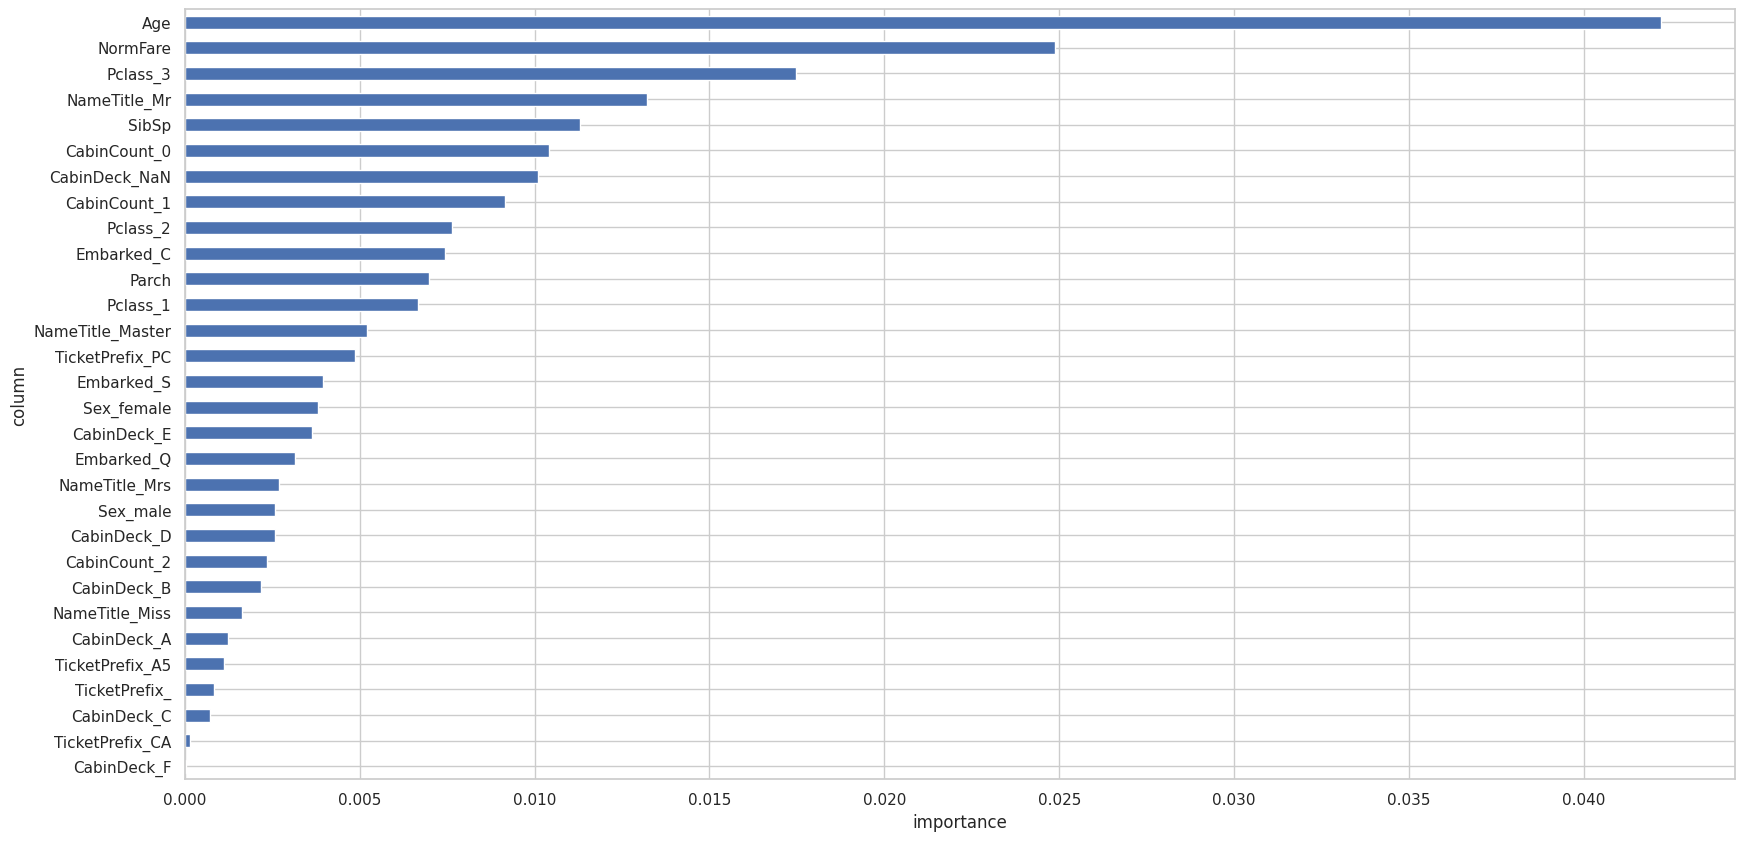

In [93]:
perm = permutation_importance(estimator=prod_final_clf_hard, X=X_train, y=y_train, scoring="accuracy", n_repeats=30)

feature_importances = pd.Series(data=perm.importances_mean, index=X_train.columns)
feature_importances = feature_importances.nlargest(n=30)
print(feature_importances)

feature_importances.plot(kind="barh", figsize=(20, 10)).invert_yaxis()  # Plot the feature importance scores
plt.xlabel("importance")
plt.ylabel("column")
plt.show()

### Precision and Recall

In [94]:
cv = StratifiedKFold(n_splits=10, shuffle=True)
y_oof = cross_val_predict(estimator=prod_final_clf_hard, X=X_train, y=y_train, cv=cv, n_jobs=-1)

In [95]:
print(confusion_matrix(y_train, y_oof))

[[501  48]
 [100 242]]


In [96]:
print(classification_report(y_train, y_oof, digits=4))

              precision    recall  f1-score   support

           0     0.8336    0.9126    0.8713       549
           1     0.8345    0.7076    0.7658       342

    accuracy                         0.8339       891
   macro avg     0.8340    0.8101    0.8186       891
weighted avg     0.8339    0.8339    0.8308       891



In [97]:
print("Accuracy: " + str(accuracy_score(y_train, y_oof)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_oof)))
print("MCC: " + str(matthews_corrcoef(y_train, y_oof)))
print("Precision: "+ str(precision_score(y_train, y_oof)))
print("Recall: " + str(recall_score(y_train, y_oof)))
print("F1: " + str(f1_score(y_train, y_oof)))

Accuracy: 0.8338945005611672
Balanced Accuracy: 0.8100853225961078
MCC: 0.6436861965291986
Precision: 0.8344827586206897
Recall: 0.7076023391812866
F1: 0.7658227848101266


## Submission

In [98]:
# Make predictions
predictions_hard = prod_final_clf_hard.predict(X_test)
predictions_soft = prod_final_clf_soft.predict(X_test)
predictions_weight = prod_final_clf_weight.predict(X_test)

In [99]:
# Track difference between outputs
comparison = pd.DataFrame()
comparison["PassengerId"] = test_input["PassengerId"]
comparison["Survived_vc_hard"] = predictions_hard
comparison["Survived_vc_soft"] = predictions_soft
comparison["Survived_vc_weight"] = predictions_weight

In [100]:
comparison["Difference_hard_soft"] = (comparison["Survived_vc_hard"] != comparison["Survived_vc_soft"]).astype(int)
comparison["Difference_hard_weight"] = (comparison["Survived_vc_hard"] != comparison["Survived_vc_weight"]).astype(int)

In [101]:
comparison["Difference_hard_weight"].value_counts()

Difference_hard_weight
0    395
1     23
Name: count, dtype: int64

In [102]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions_hard

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [103]:
# Create and view dataframe
submission = pd.DataFrame()
submission["PassengerId"] = test_input["PassengerId"]
submission["Survived"] = predictions_hard
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [104]:
if len(submission) == len(test_input):
    print("Submission dataframe is the same length as test (" + str(len(test_input)) + " rows).")
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [105]:
submission.to_csv("/kaggle/working/submission.csv", index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [106]:
pd.read_csv("/kaggle/working/submission.csv")  # Check the submission .csv to make sure it's in the right format

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## References

Bourke, D. (2019, May 6). *Kaggle Titanic dataset example submission workflow* [Jupyter notebook]. GitHub. Retrieved August 25, 2025 from https://github.com/mrdbourke/your-first-kaggle-submission/blob/master/kaggle-titanic-dataset-example-submission-workflow.ipynb

Jee, K. (2023, June 21). *Titanic Project Example* [Kaggle notebook]. Kaggle. Retrieved August 25, 2025, from https://www.kaggle.com/code/kenjee/titanic-project-example

Naik, K. C. (2019, January 17). *EDA* [Jupyter notebook]. GitHub. Retrieved August 25, 2025, from https://github.com/krishnaik06/EDA1/blob/master/EDA.ipynb

NeuralNine. (2022, February 14). *Titanic survival prediction in Python - machine learning project* [Video]. YouTube. https://www.youtube.com/watch?v=fATVVQfFyU0